In [1]:
# Import required libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter warnings
warnings.filterwarnings('ignore')

# Set color palettes
color_palette = sns.color_palette('flare')
pp_double_palette = sns.color_palette(['#37306B', '#D27685'])
large_palette = sns.color_palette(['#EA698B', '#D27685', '#D55D92', '#C05299', '#AC46A1', '#973AA8',
                                   '#822FAF', '#6D23B6', '#6411AD', '#571089', '#47126B', '#D27685'])

# Set default plotting style
sns.set(style="ticks", rc={"axes.spines.top": False, "axes.spines.right": False})


# 1. Data Exploration

| Variable | Description                                                          |
|----------|----------------------------------------------------------------------|
| survival | Survival -> 0 = No, 1 = Yes                                          |
| pclass   | Ticket class -> 1 = Upper, 2 = Middle, 3 = Lower                      |
| sex      | Sex of passenger                                                     |
| Age      | Age in years                                                         |
| sibsp    | # of siblings / spouses aboard the Titanic                           |
| parch    | # of parents / children aboard the Titanic                           |
| ticket   | Ticket number                                                        |
| fare     | Passenger fare                                                       |
| cabin    | Cabin number                                                         |
| embarked | Port of Embarkation -> C = Cherbourg, Q = Queenstown, S = Southampton |


## Loading and Understanding Data

In [2]:
# Load the Titanic training data
X_train = pd.read_csv('/kaggle/input/titanic/train.csv')

# Load the Titanic test data
X_test = pd.read_csv('/kaggle/input/titanic/test.csv')

# Concatenate the training and test data
data = pd.concat([X_train, X_test], sort=True).reset_index(drop=True)

data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [3]:
# Get the shape of the data and print it
print('Shape of the data:', data.shape)

Shape of the data: (1309, 12)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [5]:
data.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


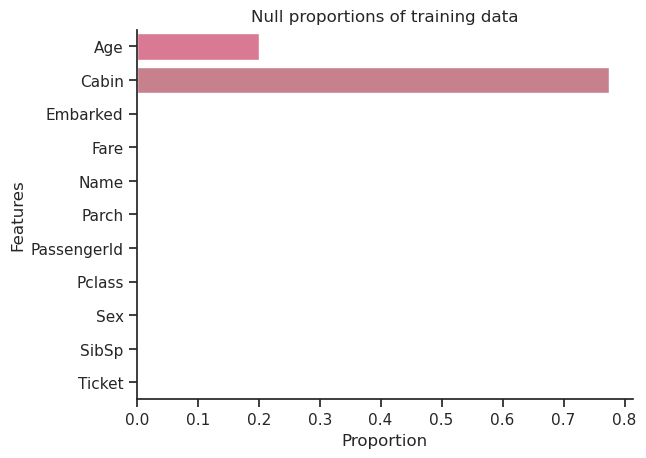

In [6]:
# Calculate the proportion of null values for each column and create a bar plot
null_proportions = data.drop('Survived', axis=1).isna().sum() / len(data)
nulls_plt = sns.barplot(x=null_proportions, y=data.drop('Survived', axis=1).columns, palette=large_palette)

# Set the title, x label, and y label for the plot
nulls_plt.set(title='Null proportions of training data', xlabel='Proportion', ylabel='Features')

# Display the plot
plt.show()

The "Cabin" feature in the training dataset has a large number of null values. This is not unusual, as only first class passengers were assigned cabins. Therefore, we can fill the null values with the string "none".

However, approximately 20% of the "Age" column is also missing, and this is a numerical value. It would not be appropriate to fill these missing values with "unknown" or any other string. While the usual practice is to fill missing numerical values with the mean or median value, doing so may result in significant information loss given that 20% of the data is missing. As a result, I have decided to search for missing data in the "Age" and "Embarked" columns and fill them accordingly.

If you would like to access the updated dataset, you can find it at the following link: https://www.kaggle.com/datasets/keremozturk/titanic-updated

In [7]:
# Read in the training data
X_train = pd.read_csv('/kaggle/input/titanic-updated/train.csv')

# Extract the target variable
y_train = X_train['Survived']

# Concatenate the training and test data
data = pd.concat([X_train, X_test], sort=True).reset_index(drop=True)

# Print the head of the training data
X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


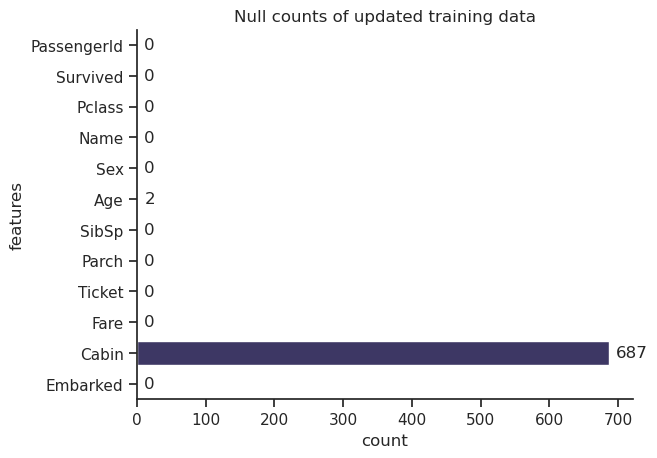

In [8]:
nulls_plt = sns.barplot(x=X_train.isna().sum(), y=X_train.columns, palette=pp_double_palette)
nulls_plt.set(title='Null counts of updated training data',
              xlabel='count', ylabel='features')

for patch in nulls_plt.patches:
    x = patch.get_width()
    y = patch.get_y() + patch.get_height() / 2
    nulls_plt.annotate(f'{x:.0f}', (x + 10, y), ha='left', va='center')

# 2. Feature Engineering and Preprocessing
In this section, we will use visualizations to gain insights into the features and brainstorm ideas to generate new synthetic features. New or old features will remain in this section but will be removed in future sections.

## Handling missing values

In [9]:
# Impute missing Age values in the test data with the mean Age
mean_age = data['Age'].mean()
data['Age'].fillna(mean_age, inplace=True)

# Impute missing Fare values in the data with the median Fare
median_fare = X_test['Fare'].median()
data['Fare'].fillna(median_fare, inplace=True)

# Fill missing Cabin values with 'none' in data
cabin_fill_value = 'none'
data['Cabin'].fillna(cabin_fill_value, inplace=True)

In [10]:
print('Number of missing values in data: ', data.isna().sum().sum())

Number of missing values in data:  418


## Sex Feature

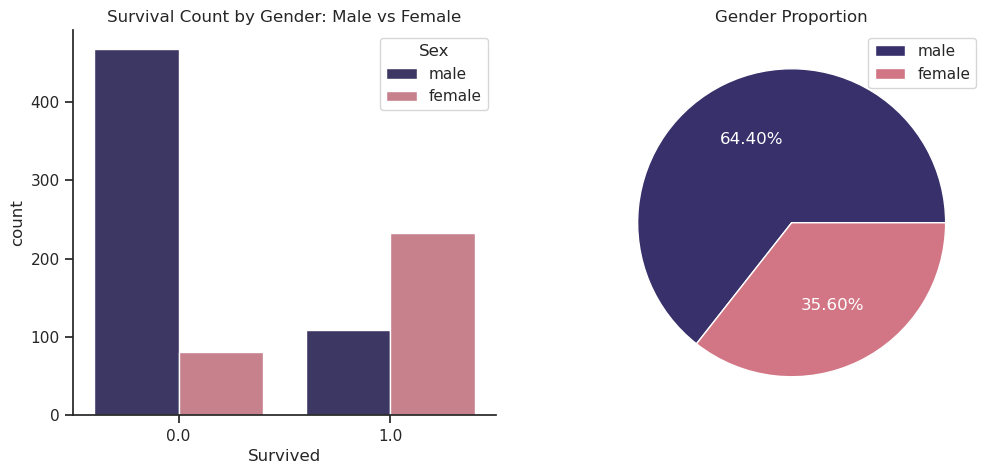

In [11]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Create a count plot of survival by gender
sns.countplot(data=data, x='Survived', hue='Sex', palette=pp_double_palette, ax=ax1)
ax1.set(title='Survival Count by Gender: Male vs Female')

# Create a pie chart of gender proportion
ax2.pie(data['Sex'].value_counts(), labels=data['Sex'].unique(),
        autopct="%0.2f%%", colors=['#37306B', '#D27685'],
        textprops={'color': 'white'})

ax2.set(title='Gender Proportion')
ax2.legend()

plt.show()

* This graph shows that females had a higher rate of survival compared to males.
* The number of Males in the dataset is more than the number of Females.

While there is a large difference in the number of observations between the "survived" and "did not survive" classes, particularly for the "survived" class where there are many more observations with a value of 1 than 0, we cannot consider this to be a class imbalance since the class labels are not evenly distributed.

## Age Feature

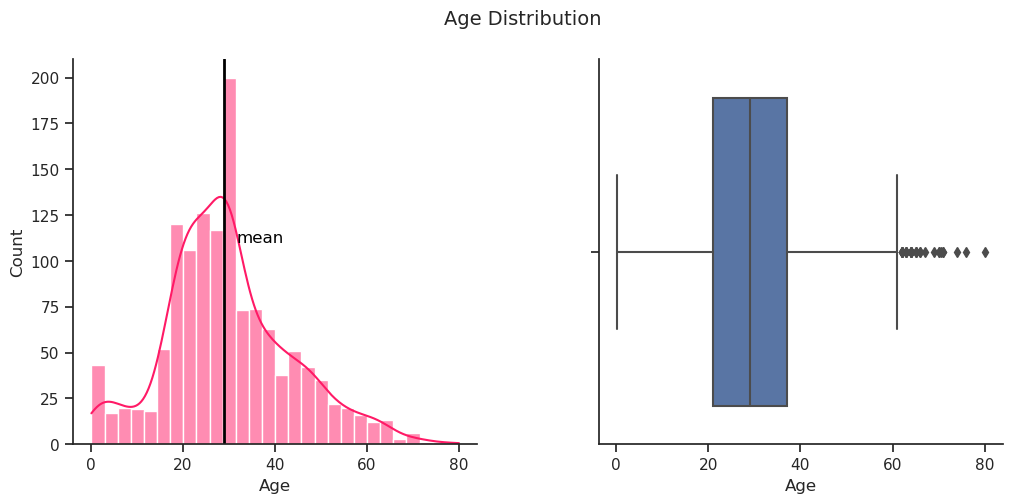

In [12]:
# Create a 2x1 grid of subplots with a shared y-axis
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Create a histogram of the 'Age' column in data, with a KDE curve and a vertical line indicating the mean age
sns.histplot(data['Age'], color='#ff1a66', ax=ax1, kde=True)
ax1.axvline(x=data['Age'].median(), color='black', lw=2)
ax1.text(x=data['Age'].mean()+2, y=110, s='mean', color='black')

# Create a boxplot of the 'Age' column in data
sns.boxplot(data=data, x='Age', ax=ax2)

# Set the title of the figure
fig.suptitle('Age Distribution', fontsize=14, fontweight='normal')

# Increase the horizontal space between the subplots
plt.subplots_adjust(wspace=0.3)

plt.show()

In [13]:
data.groupby('Survived')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0.0,549.0,30.286106,13.843125,1.00,21.00,28.0,39.0,74.0
1.0,342.0,28.510731,14.476444,0.42,19.25,28.0,37.0,80.0


* The first graph displays the distribution of age data and indicates a normal distribution pattern.

* The boxplot reveals the presence of outliers, which may have a significant impact on the model's performance. Furthermore, normalization may be required to account for the different units used in the Age and Fare columns. However, the decision to normalize the data will be made after the completion of further analysis.

* Upon examining the table, it is evident that there is a small age difference, usually around 2 years, between survivors and non-survivors. This finding suggests that the Age feature may not significantly contribute to the model's predictive power on its own.

### New Feature Age_group

In [14]:
data['Age_group'] = pd.cut(data['Age'], bins=[0, 5, 18, 35, 50, 80], labels=[1, 2, 3, 4, 5])

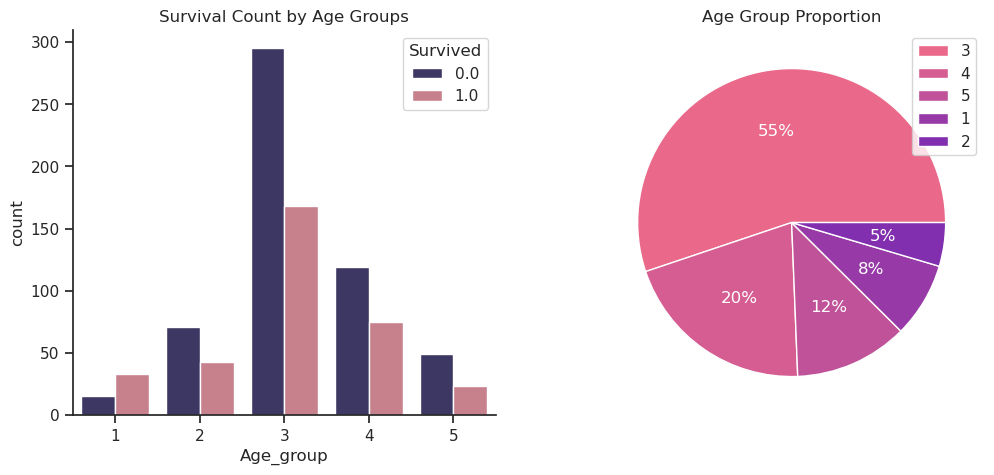

In [15]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Create a count plot of survival by age
sns.countplot(data=data, x='Age_group', hue='Survived', palette=pp_double_palette, ax=ax1)
ax1.set(title='Survival Count by Age Groups')

# Create a pie chart of age proportion
ax2.pie(data['Age_group'].value_counts(), labels=data['Age_group'].unique(),
        autopct="%0.f%%", colors=['#EA698B', '#D55D92', '#C05299', '#973AA8', '#822FAF',
                                  '#6D23B6','#6411AD', '#571089', '#47126B', '#D27685'],
        textprops={'color': 'white'})

ax2.set(title='Age Group Proportion')
ax2.legend()

plt.show()

|Age Group|Group Code|
|---------|----------|
|    0-5  |     1    |
|   6-18  |     2    |
|  19-35  |     3    |
|  36-40  |     4    |
|  50-80  |     5    |

* Based on the analysis of the new feature, it appears that passengers in the age range of 0-5 have a higher likelihood of survival compared to other age groups.

* Despite reducing the number of age groups, we have observed that the minority groups, such as the youngest and oldest passengers, have a relatively small number of observations. To address this issue, I recommend applying the Synthetic Minority Over-sampling Technique (SMOTE) to generate synthetic data for the minority groups. This technique can help balance the data distribution and improve the performance of the model in predicting survival rates for all age groups. (to be evaluated)

## Fare Feature

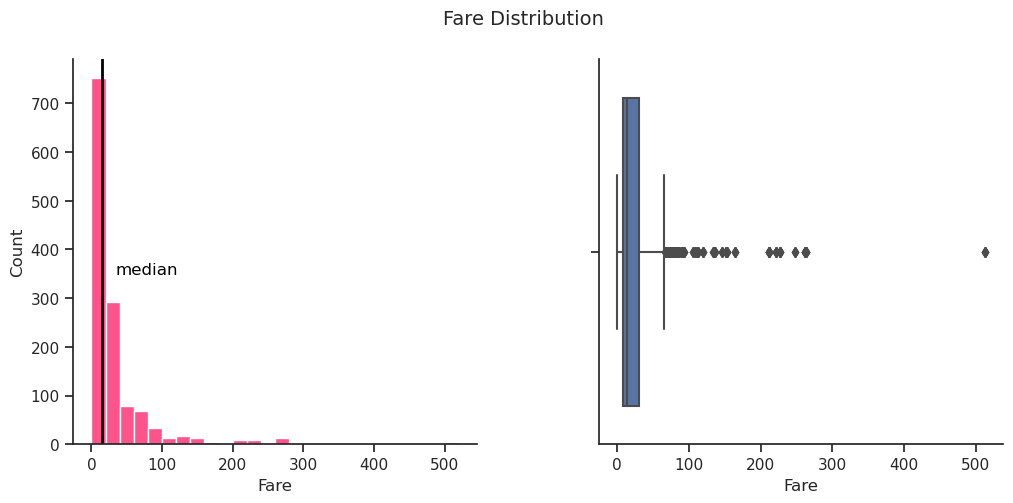

In [16]:
# Create a 2x1 grid of subplots with a shared y-axis
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Create a histogram of the 'Fare' column in data, with a vertical line indicating the median Fare
sns.histplot(data['Fare'], color='#ff1a66', ax=ax1, binwidth=20)
ax1.axvline(x=data['Fare'].median(), color='black', lw=2)
ax1.text(x=data['Fare'].median()+20, y=350, s='median', color='black')

# Create a boxplot of the 'Fare' column in data
sns.boxplot(data=data, x='Fare', ax=ax2)

# Set the title of the figure
fig.suptitle('Fare Distribution', fontsize=14, fontweight='normal')

# Increase the horizontal space between the subplots
plt.subplots_adjust(wspace=0.3)

plt.show()

* The distribution of the data is skewed to the right, indicating that there are more higher values than lower values. To address this, I recommend applying a log transformation to the data to reduce the skewness and improve the model's performance.

* The data contains a significant number of outliers, which can negatively impact the accuracy of the model. To mitigate the effect of outliers, I suggest grouping values into bins to ensure that the model focuses on the most relevant information.

* Age and Fare are measured using different units, which can cause bias in the analysis. To remove this bias, we propose normalizing the data to ensure that the values are on the same scale and that the model can more accurately compare and weigh the variables.

In [17]:
data['Fare'].quantile([0.0, 0.20, 0.4, 0.6, 0.8, 1])

0.0      0.00000
0.2      7.85420
0.4     10.50000
0.6     21.55836
0.8     41.57920
1.0    512.32920
Name: Fare, dtype: float64

In [18]:
data['Fare_group'] = pd.qcut(data['Fare'], 13)

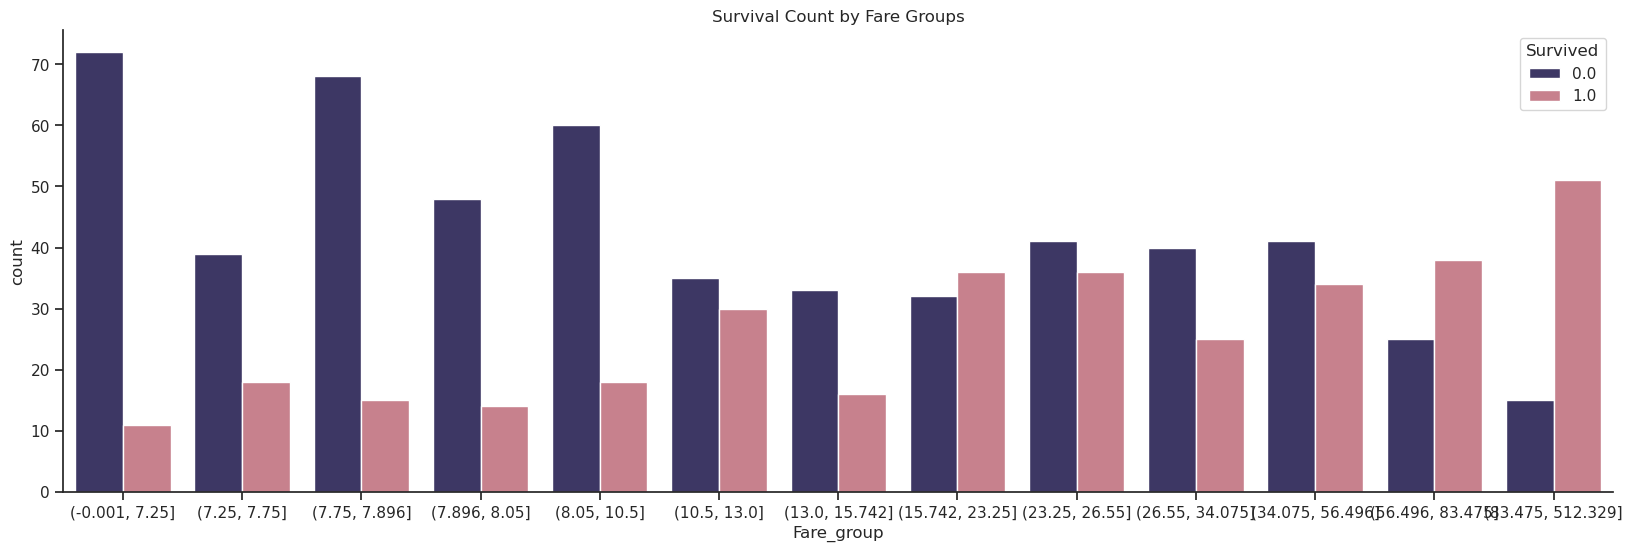

In [19]:
# Set figure size
plt.figure(figsize=(20, 6))

# Create a count plot of survival by Fare_group
fare_gc = sns.countplot(data=data, x='Fare_group', hue='Survived', palette=pp_double_palette)
fare_gc.set(title='Survival Count by Fare Groups')

plt.show()

* The survival rate tends to increase with higher values of the 'Fare_group' variable, indicating that passengers who paid more for their ticket had a better chance of surviving.

### Log transformation of Fare

In [20]:
data['Fare'] = np.log(data['Fare'] + 1)

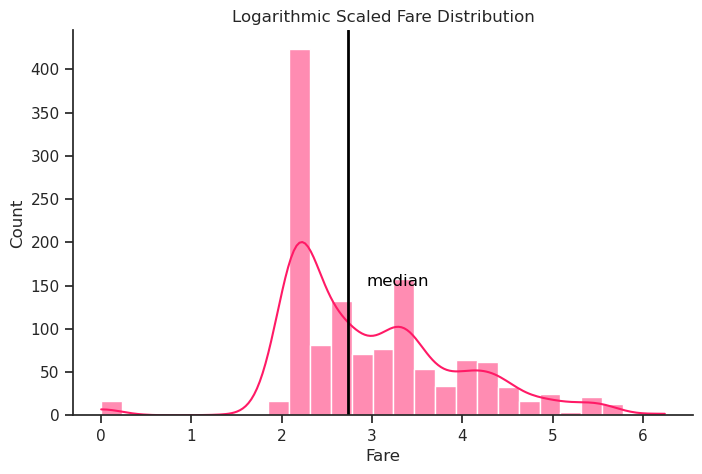

In [21]:
# Create a histogram of the 'Fare' column in data, with a KDE curve and a vertical line indicating the median age
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data['Fare'], color='#ff1a66', kde=True, ax=ax)

# Add a vertical line indicating the median fare
median_fare = data['Fare'].median()
ax.axvline(x=median_fare, color='black', lw=2)

# Add text to label the median line
ax.text(x=median_fare+0.2, y=150, s='median', color='black')

# Set the title of the plot
ax.set(title='Logarithmic Scaled Fare Distribution')

# Display the plot
plt.show()

## Name Feature

In [22]:
# Define function to extract title from name
title_list = ['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev', 'Dr', 'Ms', 'Mlle', 'Col', 'Capt', 'Mme', 'Countess', 'Don', 'Jonkheer']
def get_title(name):
    for title in title_list:
        if title in name:
            return title
        
# Extract title and cabin category from name and cabin columns
data['Title'] = data['Name'].apply(get_title)

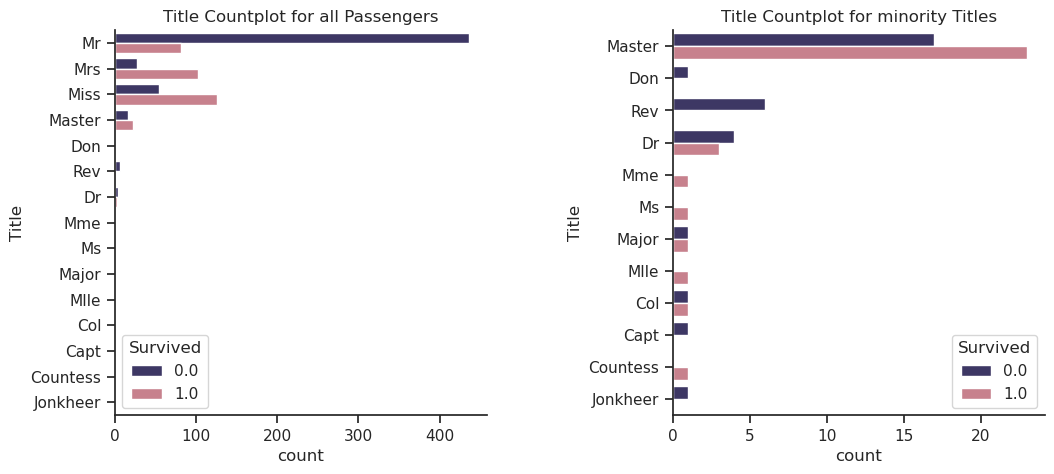

In [23]:
# Define the subplots and figure size
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Create the first countplot on the first axis
sns.countplot(data=data, y='Title', hue='Survived', palette=pp_double_palette, ax=ax1)
ax1.set_title('Title Countplot for all Passengers')

# Create the second countplot on the second axis
non_miss_titles = data[data['Title'].isin(['Mr', 'Mrs', 'Miss']) == False]
sns.countplot(data=non_miss_titles, y='Title', hue='Survived', palette=pp_double_palette, ax=ax2)
ax2.set_title('Title Countplot for minority Titles')

# Increase the horizontal space between the subplots
plt.subplots_adjust(wspace=0.5)

# Show the plot
plt.show()

The countplot figure shows that several titles have a small number of observations, which may result in these features being dropped during feature selection. To address this issue, we can use mean encoding to transform these titles into continuous variables that are more informative for the model.

In [24]:
mean_title = data.groupby('Title')['Survived'].mean()
mean_title

Title
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dr          0.428571
Jonkheer    0.000000
Major       0.500000
Master      0.575000
Miss        0.700000
Mlle        1.000000
Mme         1.000000
Mr          0.158301
Mrs         0.790698
Ms          1.000000
Rev         0.000000
Name: Survived, dtype: float64

In [25]:
# Convert mean_title DataFrame to dictionary
mean_encoding = mean_title.to_dict()

# Map the mean encoding to the 'Title' column in the data
data['Title'] = data['Title'].map(mean_encoding)

In [26]:
data['Name_len'] = data['Name'].apply(lambda x: len(x))

In [27]:
data['Survived'].groupby(pd.qcut(data['Name_len'], 6)).mean()

Name_len
(11.999, 19.0]    0.220588
(19.0, 22.0]      0.307692
(22.0, 25.0]      0.328467
(25.0, 28.0]      0.316901
(28.0, 35.0]      0.496815
(35.0, 82.0]      0.694030
Name: Survived, dtype: float64

## Cabin Feature

In [28]:
data['Cabin'].describe()

count     1309
unique     187
top       none
freq      1014
Name: Cabin, dtype: object

In [29]:
data['Cabin'].unique()

array(['none', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C6

The cabin names in the dataset contain letters such as A, B, and C. We may be able to create a useful grouping based on these letters. However, the number of cabins with letter names is small compared to those without names. To address this, we can group all cabins with letter names together and label them as '1', while cabins without letter names can be labeled as '0'. We can further explore this approach by visualizing the distribution of survival rates across these groups.

In [30]:
# Define function to extract cabin category from cabin number
def get_cabin(cabin):
    for letter in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
        if letter in cabin:
            return letter
    return 'none'

data['Deck'] = data['Cabin'].apply(get_cabin)

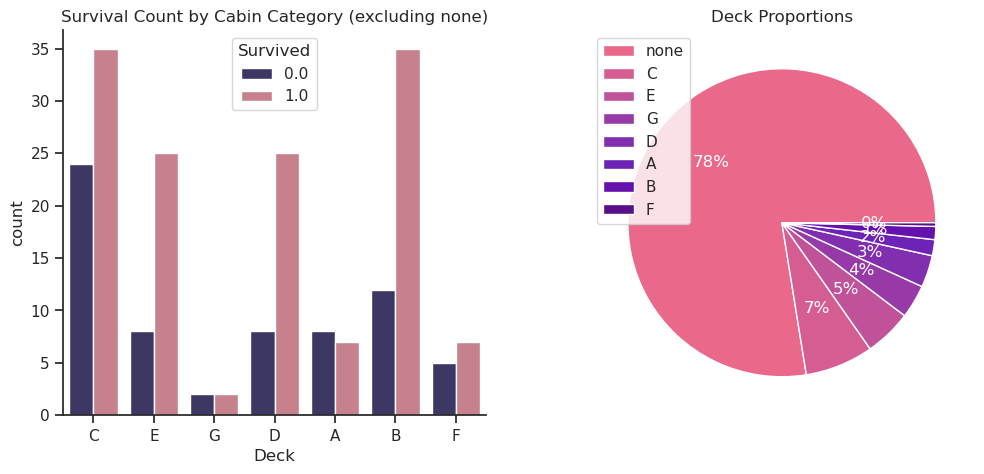

In [31]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Create a count plot of survival by deck
sns.countplot(data=data[data['Deck'] != 'none'], x='Deck', hue='Survived', palette=pp_double_palette, ax=ax1)
ax1.set(title='Survival Count by Cabin Category (excluding none)')

# Create a pie chart of deck proportions
ax2.pie(data['Deck'].value_counts().dropna(), labels=data['Deck'].unique(),
        autopct="%0.f%%", colors=['#EA698B', '#D55D92', '#C05299', '#973AA8', '#822FAF',
                                  '#6D23B6','#6411AD', '#571089', '#47126B', '#D27685'],
        textprops={'color': 'white'})

ax2.set(title='Deck Proportions')
ax2.legend()

# Show the plot
plt.show()

### New feature has_cabin 

In [32]:
# Add a new column indicating whether the passenger has a cabin or not
data['has_cabin'] = np.where(data['Deck'] != 'none', 1, 0)

## SibSp and Parch Features

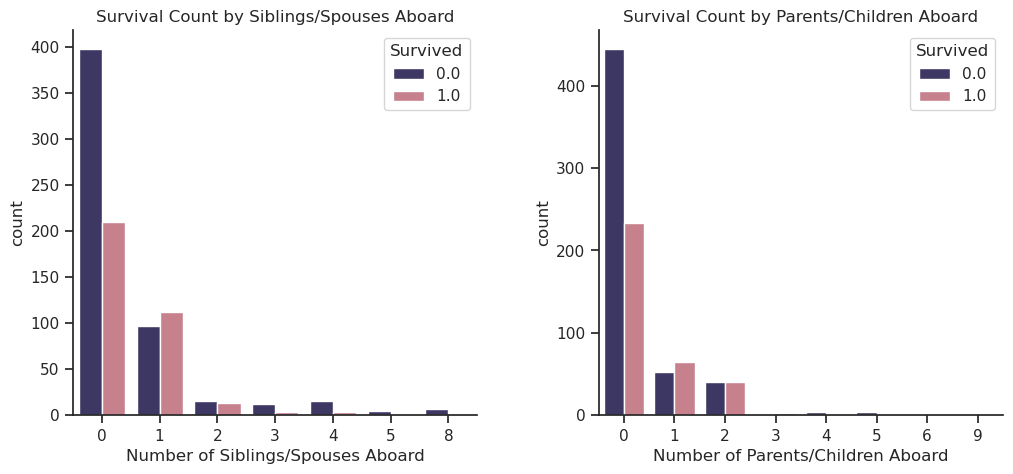

In [33]:
# Create a 1x2 grid of subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Create a countplot of 'SibSp' column in data, colored by 'Survived' column
sns.countplot(data=data, x='SibSp', hue='Survived', palette=pp_double_palette, ax=ax1)

# Create a countplot of 'Parch' column in data, colored by 'Survived' column
sns.countplot(data=data, x='Parch', hue='Survived', palette=pp_double_palette, ax=ax2)

# Add titles and adjust spacing
ax1.set(title='Survival Count by Siblings/Spouses Aboard', xlabel='Number of Siblings/Spouses Aboard')
ax2.set(title='Survival Count by Parents/Children Aboard', xlabel='Number of Parents/Children Aboard')
plt.subplots_adjust(wspace=0.3)

plt.show()

* Passengers who did not have any Parent/Children on board were highly unlikely to survive.
* Passengers who did not have any Siblings/Spouses on board were highly unlikely to survive

### New feature Family_size

In [34]:
# Combine sibling/spouse and parent/child counts into family size feature
data['Family_size'] = data['SibSp'] + data['Parch'] + 1

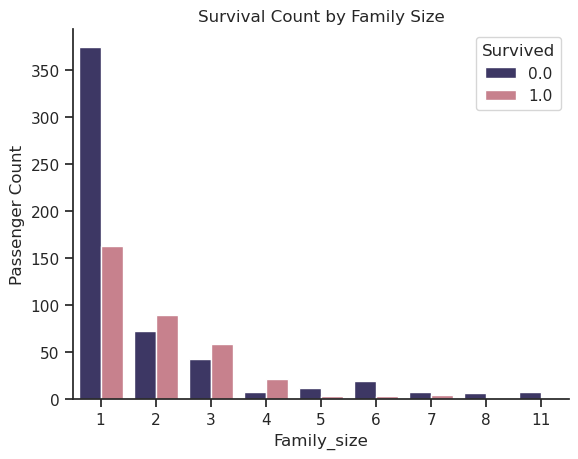

In [35]:
# Create a count plot of survival by family size in data
fs_plot = sns.countplot(data=data, x='Family_size', hue='Survived', palette=pp_double_palette)
fs_plot.set(title='Survival Count by Family Size', ylabel='Passenger Count')

plt.show()

* Passengers traveling with 2, 3, or 4 family members have a higher chance of survival compared to other passengers. On the other hand, solo travelers and families with more than 4 members have a lower chance of survival.

### New features is_alone, Mid_sized_family, Large_sized_family

In [36]:
# Create a new column 'is_alone' in the data
data['is_alone'] = np.where(data['Family_size'] == 1, 1, 0)

# Create a new column 'Mid_sized_family' in the data
data['Mid_sized_family'] = np.where(data['Family_size'].isin([2, 3, 4]), 1, 0)

# Create a new column 'Large_sized_family' in the data
data['Large_sized_family'] = np.where(data['Family_size'] > 4, 1, 0)

## Embarked Feature

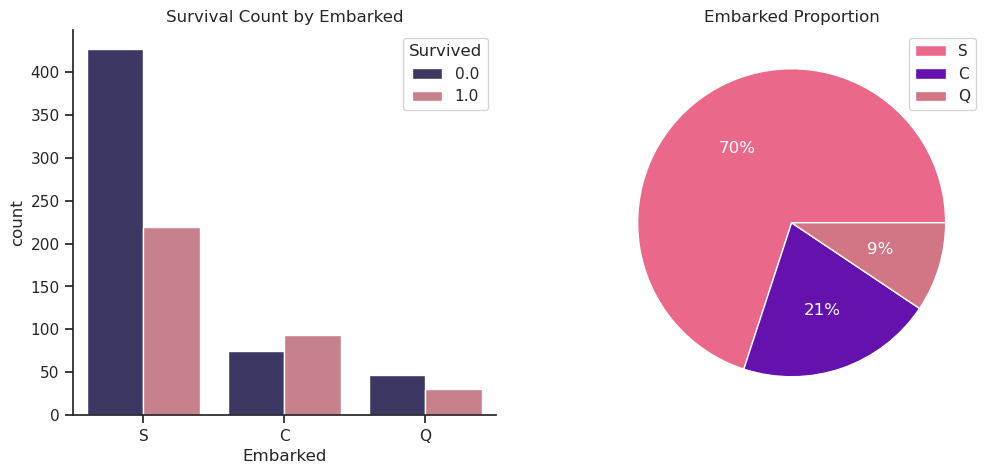

In [37]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Create a count plot of survival by Embarked
sns.countplot(data=data, x='Embarked', hue='Survived', palette=pp_double_palette, ax=ax1)
ax1.set(title='Survival Count by Embarked')

# Create a pie chart of Embarked proportion
ax2.pie(data['Embarked'].value_counts().dropna(), labels=data['Embarked'].unique(),
        autopct="%0.f%%", colors=['#EA698B', '#6411AD', '#D27685'],
        textprops={'color': 'white'})

ax2.set(title='Embarked Proportion')
ax2.legend()

plt.show()

* Passengers who embarked from Cherbourg have a higher chance of survival.
* The number of passengers who embarked from Queenstown (Q) is relatively small compared to the other points. To improve the model's performance on this minority class, SMOTE (Synthetic Minority Over-sampling Technique) can be used.

## Ticket Feature

From the information in the cells below, it is evident that the 'Ticket' attribute contains a large number of unique values that consist of both letters and numbers. Another observation that can be made from this is that individuals with the same ticket value tend to share similar characteristics. It is possible that they are traveling companions, such as friends or family members, who embarked on the journey together.

In [38]:
data['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [39]:
data['Ticket'].describe()

count         1309
unique         929
top       CA. 2343
freq            11
Name: Ticket, dtype: object

In [40]:
data[data['Ticket'] == '1601']

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Age_group,Fare_group,Title,Name_len,Deck,has_cabin,Family_size,is_alone,Mid_sized_family,Large_sized_family
74,32.000000,none,S,4.051712,"Bing, Mr. Lee",0,75,3,male,0,...,3,"(34.075, 56.496]",0.158301,13,none,0,1,1,0,0
169,28.000000,none,S,4.051712,"Ling, Mr. Lee",0,170,3,male,0,...,3,"(34.075, 56.496]",0.158301,13,none,0,1,1,0,0
509,26.000000,none,S,4.051712,"Lang, Mr. Fang",0,510,3,male,0,...,3,"(34.075, 56.496]",0.158301,14,none,0,1,1,0,0
643,32.000000,none,S,4.051712,"Foo, Mr. Choong",0,644,3,male,0,...,3,"(34.075, 56.496]",0.158301,15,none,0,1,1,0,0
692,38.000000,none,S,4.051712,"Lam, Mr. Ali",0,693,3,male,0,...,4,"(34.075, 56.496]",0.158301,12,none,0,1,1,0,0
826,23.000000,none,S,4.051712,"Lam, Mr. Len",0,827,3,male,0,...,3,"(34.075, 56.496]",0.158301,12,none,0,1,1,0,0
838,32.000000,none,S,4.051712,"Chip, Mr. Chang",0,839,3,male,0,...,3,"(34.075, 56.496]",0.158301,15,none,0,1,1,0,0
930,29.785971,none,S,4.051712,"Hee, Mr. Ling",0,931,3,male,0,...,3,"(34.075, 56.496]",0.158301,13,none,0,1,1,0,0


In [41]:
# Extract the first character of the 'Ticket' column and create a new column for data
data['Ticket_first_char'] = data['Ticket'].apply(lambda t: str(t)[0])

data.groupby('Ticket_first_char')['Survived'].mean()

Ticket_first_char
1    0.630137
2    0.464481
3    0.239203
4    0.200000
5    0.000000
6    0.166667
7    0.111111
8    0.000000
9    1.000000
A    0.068966
C    0.340426
F    0.571429
L    0.250000
P    0.646154
S    0.323077
W    0.153846
Name: Survived, dtype: float64

In [42]:
# Compute mean encoding of 'Ticket_first_char' column based on 'Survived' column in data
mean_encoding = data.groupby('Ticket_first_char')['Survived'].mean().to_dict()

# Replace 'Ticket_first_char' values with their respective mean encoding in data
data['Ticket_first_char'] = data['Ticket_first_char'].map(mean_encoding)

In [43]:
# Add a new column for ticket length
data['Ticket_len'] = data['Ticket'].apply(lambda ticket: len(ticket))

In [44]:
data['Ticket_freq'] = data.groupby('Ticket')['Ticket'].transform('count')

## Pclass Feature

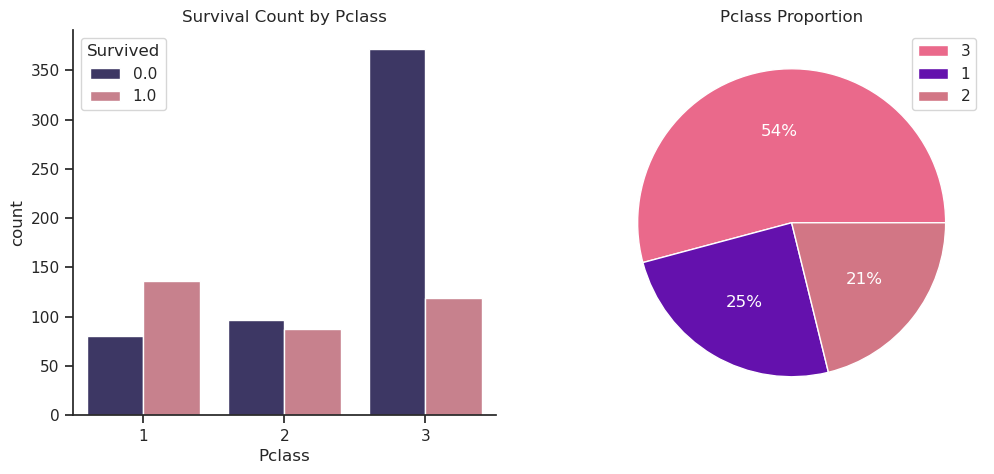

In [45]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Create a count plot of survival by Pclass
sns.countplot(data=data, x='Pclass', hue='Survived', palette=pp_double_palette, ax=ax1)
ax1.set(title='Survival Count by Pclass')

# Create a pie chart of Pclass proportion
ax2.pie(data['Pclass'].value_counts().dropna(), labels=data['Pclass'].unique(),
        autopct="%0.f%%", colors=['#EA698B', '#6411AD', '#D27685'],
        textprops={'color': 'white'})

ax2.set(title='Pclass Proportion')
ax2.legend()

plt.show()

* First-class passengers had a higher chance of survival compared to other passengers.

* The majority of third-class passengers did not survive the disaster.

The chance of survival decreased as the class of the passenger decreased, indicating that social class played a significant role in determining a passenger's survival chances.

## Drop unnecessary columns

In [46]:
# Save PassengerId column for submission
p_id = X_test['PassengerId']

In [47]:
# Drop unnecessary columns
data = data.drop(['Name', 'PassengerId', 'Ticket', 'Cabin', 'Survived'], axis=1)

## Normalizing Age and Fare

In [48]:
from sklearn.preprocessing import MinMaxScaler

# Create MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform 'Fare' and 'Age' columns in data
data[['Fare', 'Age']] = scaler.fit_transform(data[['Fare', 'Age']])

In [49]:
data[['Fare', 'Age']].head()

,Fare,Age
0,0.338125,0.273456
1,0.685892,0.473882
2,0.350727,0.323563
3,0.639463,0.436302
4,0.352955,0.436302


## Encoding categorical data

In [50]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

In [51]:
data.dtypes

Age                    float64
Embarked                object
Fare                   float64
Parch                    int64
Pclass                   int64
Sex                     object
SibSp                    int64
Age_group             category
Fare_group            category
Title                  float64
Name_len                 int64
Deck                    object
has_cabin                int64
Family_size              int64
is_alone                 int64
Mid_sized_family         int64
Large_sized_family       int64
Ticket_first_char      float64
Ticket_len               int64
Ticket_freq              int64
dtype: object

In [52]:
# Define the non-numeric columns to be label encoded
non_numeric_cols = ['Sex', 'Embarked', 'Age_group', 'Fare_group', 'Deck']

# Loop through the dataframes and label encode the non-numeric features
for col in non_numeric_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

In [53]:
data.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Age_group,Fare_group,Title,Name_len,Deck,has_cabin,Family_size,is_alone,Mid_sized_family,Large_sized_family,Ticket_first_char,Ticket_len,Ticket_freq
0,0.273456,2,0.338125,0,3,1,1,2,0,0.158301,23,7,0,2,0,1,0,0.068966,9,1
1,0.473882,0,0.685892,0,1,0,1,3,11,0.790698,51,2,1,2,0,1,0,0.646154,8,2
2,0.323563,2,0.350727,0,3,0,0,2,3,0.700000,22,7,0,1,1,0,0,0.323077,16,1
3,0.436302,2,0.639463,0,1,0,1,2,10,0.790698,44,2,1,2,0,1,0,0.630137,6,2
4,0.436302,2,0.352955,0,3,1,0,2,3,0.158301,24,7,0,1,1,0,0,0.239203,6,1


In [54]:
# Define the categorical columns to be one-hot encoded
cat_cols = ['Pclass', 'Sex', 'Deck', 'Embarked']

# Define the ColumnTransformer object to encode the categorical columns
ohe = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto', handle_unknown='ignore', sparse=False), cat_cols)],
    remainder='passthrough',
    verbose_feature_names_out=False
)

# Fit and transform the training data using the ColumnTransformer
encoded_data = ohe.fit_transform(data)
data = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out())

In [55]:
data.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Deck_0,Deck_1,Deck_2,Deck_3,Deck_4,...,Title,Name_len,has_cabin,Family_size,is_alone,Mid_sized_family,Large_sized_family,Ticket_first_char,Ticket_len,Ticket_freq
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.158301,23.0,0.0,2.0,0.0,1.0,0.0,0.068966,9.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.790698,51.0,1.0,2.0,0.0,1.0,0.0,0.646154,8.0,2.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.700000,22.0,0.0,1.0,1.0,0.0,0.0,0.323077,16.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.790698,44.0,1.0,2.0,0.0,1.0,0.0,0.630137,6.0,2.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.158301,24.0,0.0,1.0,1.0,0.0,0.0,0.239203,6.0,1.0


### Split data into train and test sets

In [56]:
X_train, X_test = data.loc[:890], data.loc[891:]

# 3. Feature Selection

In [57]:
!pip install BorutaShap --quiet

from BorutaShap import BorutaShap

# Create the BorutaShap feature selector
selector = BorutaShap(importance_measure='shap', classification=True)

# Fit the selector to the training data
selector.fit(X=X_train, y=y_train, n_trials=100, sample=False, verbose=True)

  0%|          | 0/100 [00:00<?, ?it/s]

11 attributes confirmed important: ['Sex_0', 'Age', 'Deck_7', 'Ticket_freq', 'Title', 'Fare', 'Ticket_first_char', 'Pclass_3', 'Name_len', 'Sex_1', 'has_cabin']
21 attributes confirmed unimportant: ['Deck_3', 'Pclass_2', 'Age_group', 'Deck_0', 'Deck_1', 'Fare_group', 'Mid_sized_family', 'Pclass_1', 'Embarked_0', 'Parch', 'Embarked_2', 'SibSp', 'Embarked_1', 'Deck_5', 'Deck_2', 'Deck_6', 'Family_size', 'Large_sized_family', 'Ticket_len', 'Deck_4', 'is_alone']
0 tentative attributes remains: []


In [58]:
X_train.drop(selector.features_to_remove, axis=1, inplace=True)
X_test.drop(selector.features_to_remove, axis=1, inplace=True)

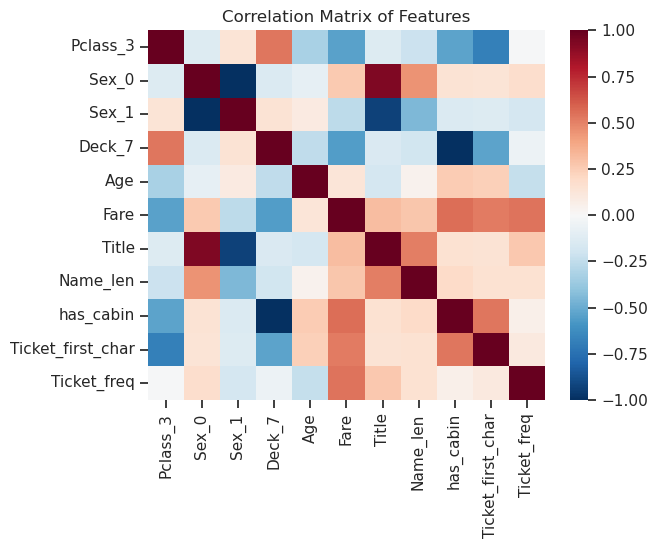

In [59]:
# Calculate the correlation matrix
corr_matrix = X_train.corr()

# Create heatmap with 'coolwarm' colormap and centered colorbar
sns.heatmap(data=corr_matrix, cmap='RdBu_r')

# Set plot title
plt.title('Correlation Matrix of Features')

# Display plot
plt.show()

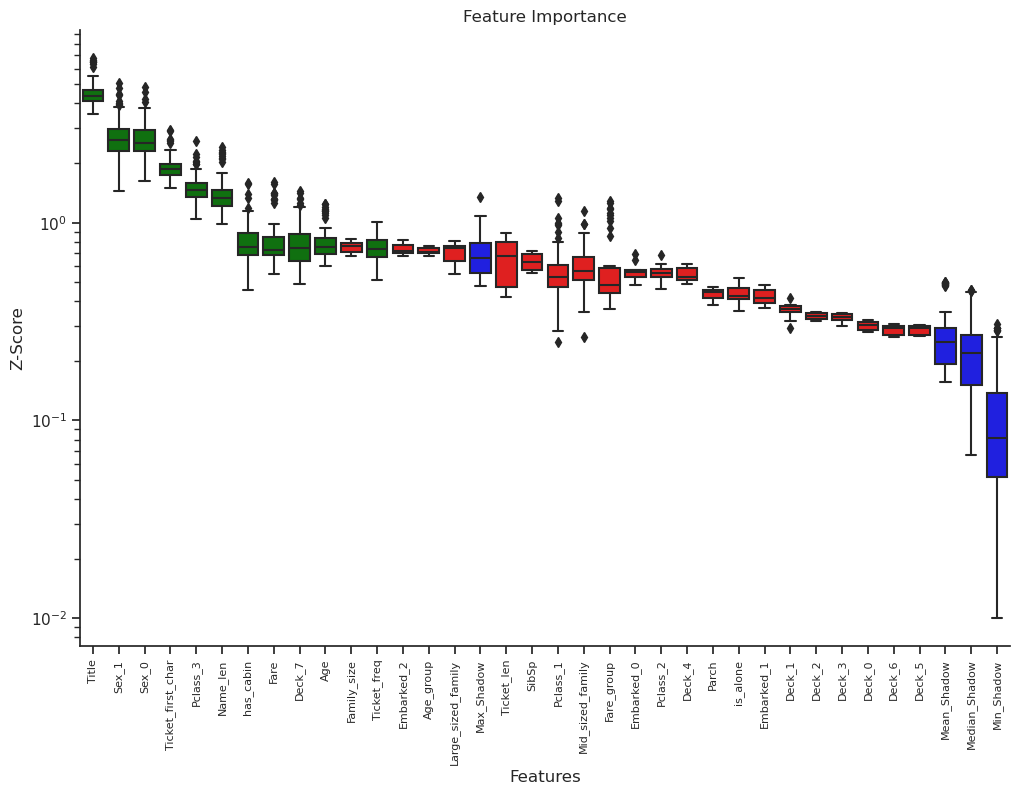

In [60]:
selector.plot(which_features='all')

# 4. Model Selection

We have imported a range of important classification algorithms below. However, to find the best performing models, I needed to examine their hyperparameters graphically. Unfortunately, running hyperparameter tuning with algorithms such as randomizedsearchcv, gridsearchcv and bayesianoptimization can be time-consuming, especially when searching a wide range of values. Additionally, these methods may not always guarantee the best results. Therefore, I decided to manually fine-tune the hyperparameters to achieve better accuracy and reduce computation time. For more complex models, Bayesian optimization is often a more effective method to fine-tune hyperparameters. This approach leverages probabilistic models to intelligently select the most promising hyperparameter configurations to explore, thereby reducing the overall search time and improving the quality of the final model.

In [61]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score, KFold, learning_curve, StratifiedKFold

In [62]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
kfold5 = KFold(n_splits=5, shuffle=True, random_state=42)

def cvs(model):
    print(pd.Series(cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=kfold)).describe())
    
def plot_learning_curve(model):
    train_sizes, train_scores, valid_scores = learning_curve(model, X_train, y_train,
                                                             train_sizes=np.linspace(0.1, 1.0, 25),
                                                             cv=kfold5, scoring='roc_auc')
    train_errors = train_scores.mean(axis=1)
    valid_errors = valid_scores.mean(axis=1)
    
    lc_plot = sns.lineplot(x=train_sizes, y=train_errors, color="#ff1a66", linewidth=2, label='training')
    lc_plot = sns.lineplot(x=train_sizes, y=valid_errors, color="#47126B", linewidth=2, label='validation')
    lc_plot.set(title='Learning Curve', xlabel='Size of trainig set', ylabel='CV Score')
    plt.show()

# 4.1 Fine Tuning of XGBClassifier

count    10.000000
mean      0.867568
std       0.057427
min       0.758658
25%       0.827895
50%       0.873617
75%       0.912468
max       0.938596
dtype: float64


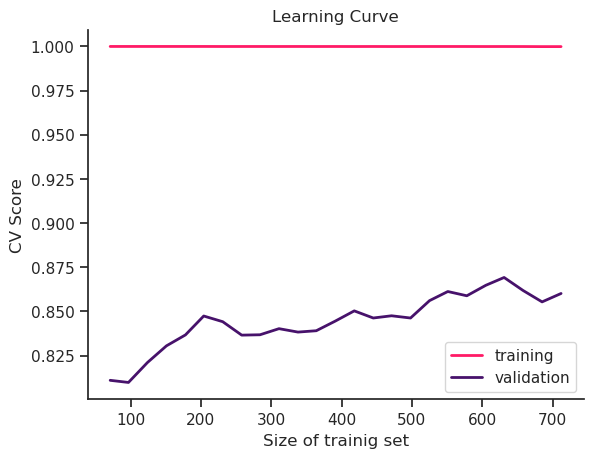

In [63]:
xgbc = XGBClassifier(random_state=42)

cvs(xgbc); plot_learning_curve(xgbc)

The current model appears to be overfitting as indicated by the convergence of the learning curves. To address this issue, one possible solution could be to increase the amount of data available for training. However, since we do not have additional data to work with, we will instead focus on fine-tuning the hyperparameters of the model.

max value is 0.02


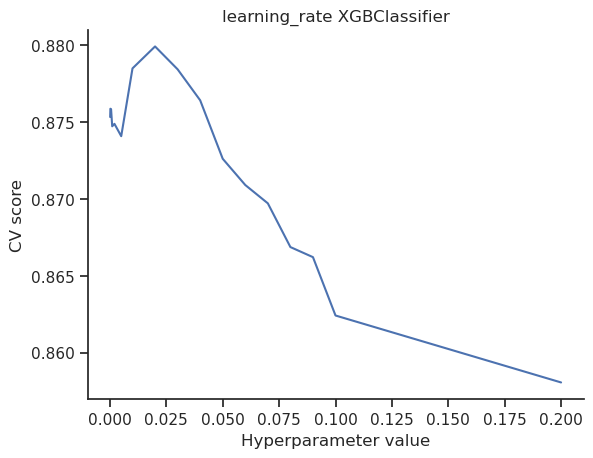

In [64]:
curve = []
hp_vals = [0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2]
for val in hp_vals:
    model = XGBClassifier(learning_rate=val, n_estimators=200, random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='roc_auc'))
    curve.append(mean_cvs)
    xgbc_learning_rate = hp_vals[curve.index(max(curve))]
    
print('max value is', xgbc_learning_rate)

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='learning_rate XGBClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show()

max value is 5


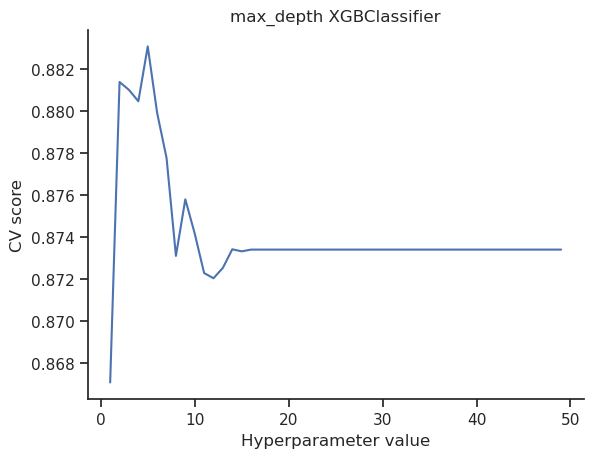

In [65]:
curve = []
hp_vals = range(1, 50)
for val in hp_vals:
    model = XGBClassifier(max_depth=val,
                          learning_rate=xgbc_learning_rate,
                          n_estimators=200,
                          random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='roc_auc'))
    curve.append(mean_cvs)
    xgbc_max_depth = hp_vals[curve.index(max(curve))]
    
print('max value is', xgbc_max_depth)

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='max_depth XGBClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show()

max value is 3


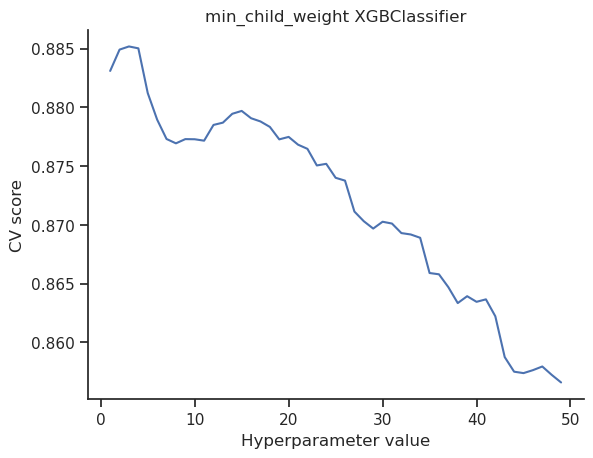

In [66]:
curve = []
hp_vals = range(1, 50)
for val in hp_vals:
    model = XGBClassifier(min_child_weight=val,
                          max_depth=xgbc_max_depth,
                          learning_rate=xgbc_learning_rate,
                          n_estimators=200,
                          random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='roc_auc'))
    curve.append(mean_cvs)
    xgbc_min_child_weight = hp_vals[curve.index(max(curve))]
    
print('max value is', xgbc_min_child_weight)

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='min_child_weight XGBClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show()

max value is 0


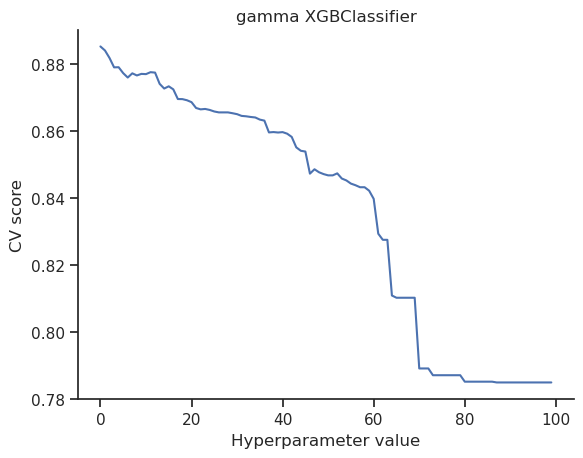

In [67]:
curve = []
hp_vals = range(0, 100)
for val in hp_vals:
    model = XGBClassifier(gamma=val,
                          min_child_weight=xgbc_min_child_weight,
                          max_depth=xgbc_max_depth,
                          learning_rate=xgbc_learning_rate,
                          n_estimators=200,
                          random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='roc_auc'))
    curve.append(mean_cvs)
    xgbc_gamma = hp_vals[curve.index(max(curve))]
    
print('max value is', xgbc_gamma)

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='gamma XGBClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show()

max value is 1


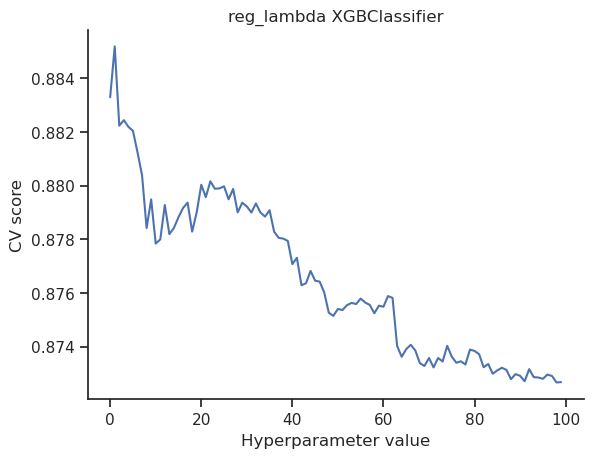

In [68]:
curve = []
hp_vals = range(0, 100)
for val in hp_vals:
    model = XGBClassifier(reg_lambda=val,
                          gamma=xgbc_gamma,
                          min_child_weight=xgbc_min_child_weight,
                          max_depth=xgbc_max_depth,
                          learning_rate=xgbc_learning_rate,
                          n_estimators=200,
                          random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='roc_auc'))
    curve.append(mean_cvs)
    xgbc_reg_lambda = hp_vals[curve.index(max(curve))]
    
print('max value is', xgbc_reg_lambda)

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='reg_lambda XGBClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show()

max value is 0


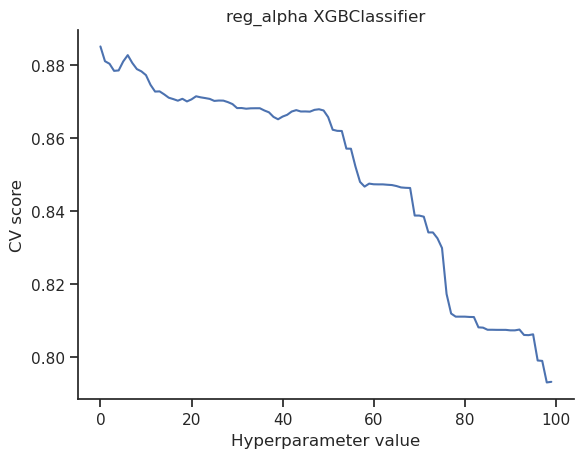

In [69]:
curve = []
hp_vals = range(0, 100)
for val in hp_vals:
    model = XGBClassifier(reg_alpha=val,
                          reg_lambda=xgbc_reg_lambda,
                          gamma=xgbc_gamma,
                          min_child_weight=xgbc_min_child_weight,
                          max_depth=xgbc_max_depth,
                          learning_rate=xgbc_learning_rate,
                          n_estimators=200,
                          random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='roc_auc'))
    curve.append(mean_cvs)
    xgbc_reg_alpha = hp_vals[curve.index(max(curve))]
    
print('max value is', xgbc_reg_alpha)

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='reg_alpha XGBClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show()

count    10.000000
mean      0.885404
std       0.046281
min       0.778950
25%       0.876200
50%       0.882077
75%       0.912801
max       0.945000
dtype: float64


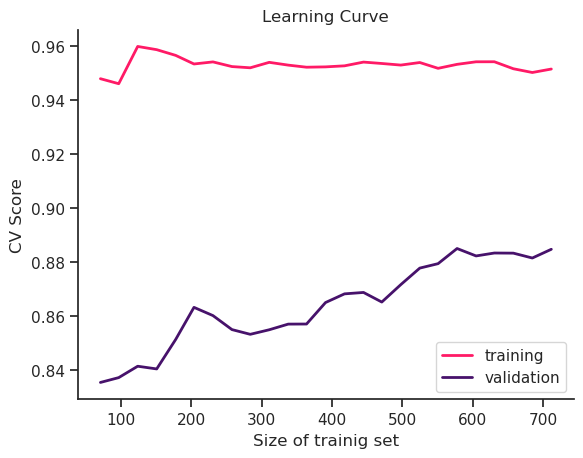

In [70]:
xgbc = XGBClassifier(n_estimators=200,
                     reg_alpha=xgbc_reg_alpha,
                     reg_lambda=xgbc_reg_lambda,
                     gamma=xgbc_gamma,
                     min_child_weight=xgbc_min_child_weight,
                     max_depth=xgbc_max_depth,
                     learning_rate=xgbc_learning_rate,
                     random_state=42)

cvs(xgbc); plot_learning_curve(xgbc)

# 4.2 Fine Tuning of RandomForestClassifier

count    10.000000
mean      0.875936
std       0.051010
min       0.775162
25%       0.855529
50%       0.882062
75%       0.912545
max       0.947500
dtype: float64


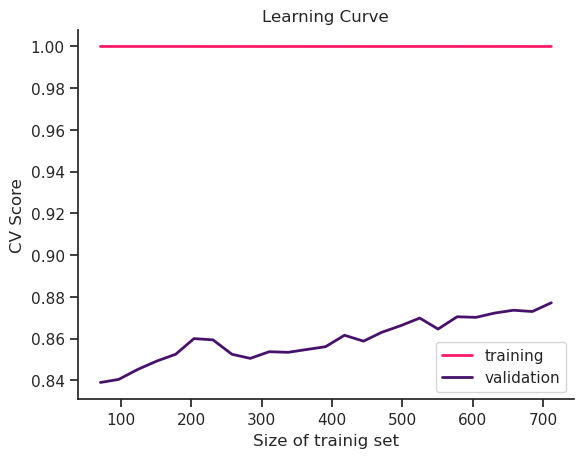

In [71]:
random_forest = RandomForestClassifier(random_state=42)

cvs(random_forest); plot_learning_curve(random_forest)

max value is 10


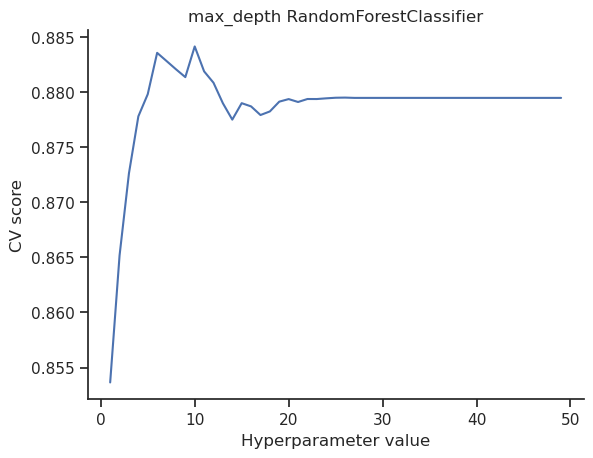

In [72]:
curve = []
hp_vals = range(1, 50)
for val in hp_vals:
    model = RandomForestClassifier(max_depth=val,
                                   n_estimators=200,
                                   random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='roc_auc'))
    curve.append(mean_cvs)
    rf_max_depth = hp_vals[curve.index(max(curve))]
    
print('max value is', rf_max_depth)

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='max_depth RandomForestClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show()

max value is 3


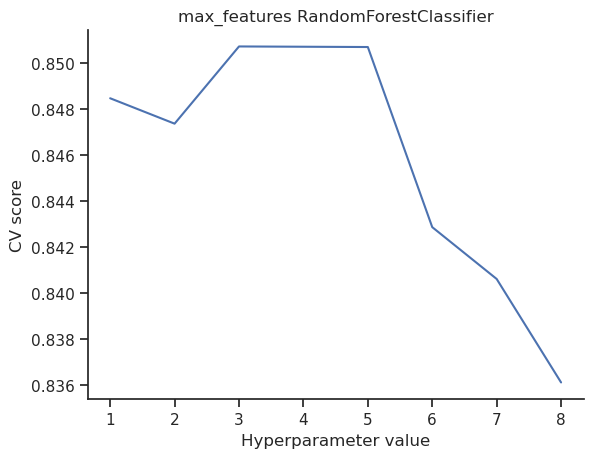

In [73]:
curve = []
hp_vals = range(1, 9)
for val in hp_vals:
    model = RandomForestClassifier(max_features=val,
                                   max_depth=rf_max_depth,
                                   n_estimators=200,
                                   random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='accuracy'))
    curve.append(mean_cvs)
    rf_max_features = hp_vals[curve.index(max(curve))]
    
print('max value is', rf_max_features)

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='max_features RandomForestClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show()

max value is 1


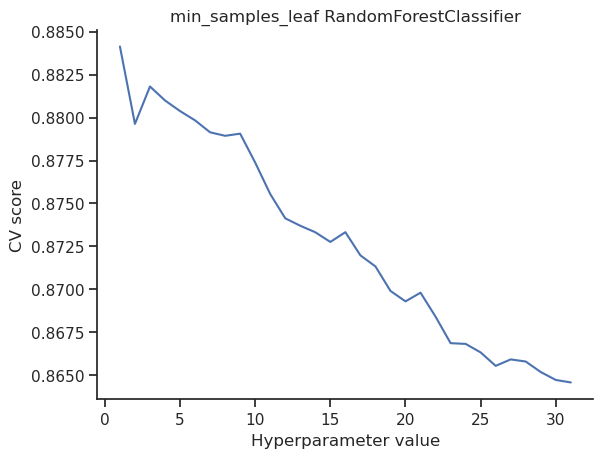

In [74]:
curve = []
hp_vals = range(1, 32)
for val in hp_vals:
    model = RandomForestClassifier(min_samples_leaf=val,
                                   max_features=rf_max_features,
                                   max_depth=rf_max_depth,
                                   n_estimators=200,
                                   random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='roc_auc'))
    curve.append(mean_cvs)
    rf_min_samples_leaf = hp_vals[curve.index(max(curve))]
    
print('max value is', rf_min_samples_leaf)

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='min_samples_leaf RandomForestClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show()

max value is 55


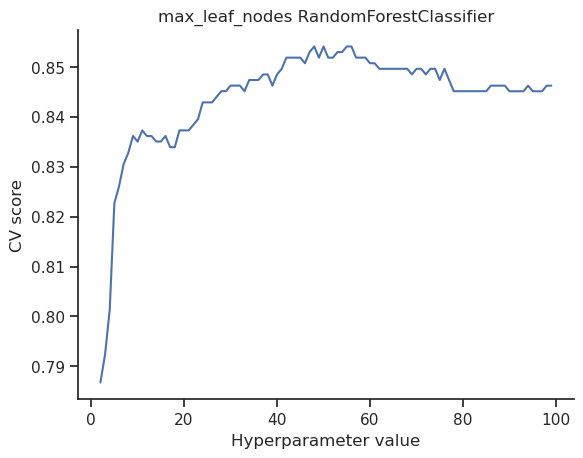

In [75]:
curve = []
hp_vals = range(2, 100)
for val in hp_vals:
    model = RandomForestClassifier(max_leaf_nodes=val,
                                   min_samples_leaf=rf_min_samples_leaf,
                                   max_features=rf_max_features,
                                   max_depth=rf_max_depth,
                                   n_estimators=200,
                                   random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='accuracy'))
    curve.append(mean_cvs)
    rf_max_leaf_nodes = hp_vals[curve.index(max(curve))]
    
print('max value is', rf_max_leaf_nodes)

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='max_leaf_nodes RandomForestClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show()

max value is 14


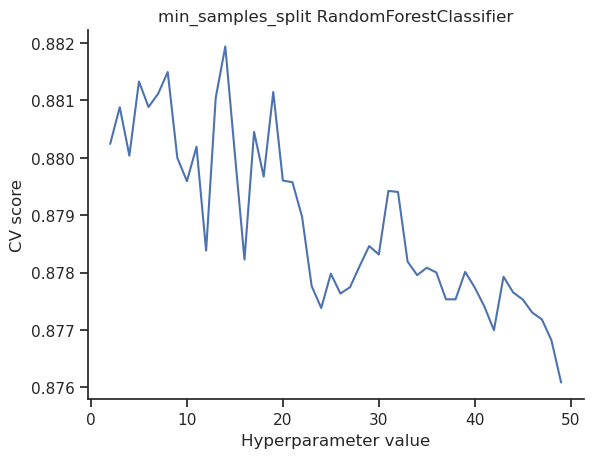

In [76]:
curve = []
hp_vals = range(2, 50)
for val in hp_vals:
    model = RandomForestClassifier(min_samples_split=val,
                                   max_leaf_nodes=rf_max_leaf_nodes,
                                   min_samples_leaf=rf_min_samples_leaf,
                                   max_features=rf_max_features,
                                   max_depth=rf_max_depth,
                                   n_estimators=200,
                                   random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='roc_auc'))
    curve.append(mean_cvs)
    rf_min_samples_split = hp_vals[curve.index(max(curve))]
    
print('max value is', rf_min_samples_split)

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='min_samples_split RandomForestClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show()

count    10.000000
mean      0.883645
std       0.047240
min       0.793290
25%       0.855798
50%       0.884230
75%       0.904887
max       0.960625
dtype: float64


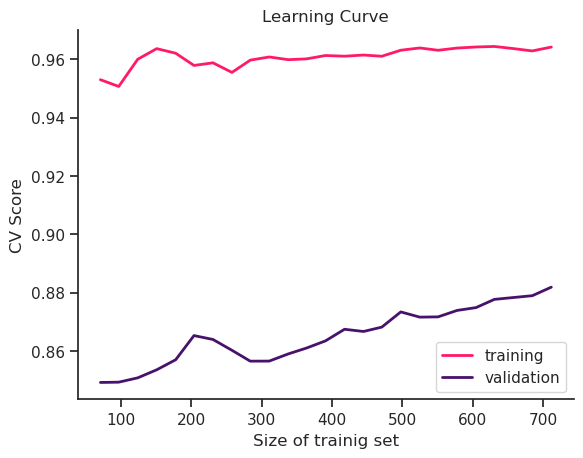

In [77]:
random_forest = RandomForestClassifier(min_samples_split=rf_min_samples_split,
                                       max_leaf_nodes=rf_max_leaf_nodes,
                                       min_samples_leaf=rf_min_samples_leaf,
                                       max_features=rf_max_features,
                                       max_depth=rf_max_depth,
                                       n_estimators=200,
                                       random_state=42)

cvs(random_forest); plot_learning_curve(random_forest)

# 4.3 Fine Tuning of LGBMClassifier

count    10.000000
mean      0.878896
std       0.051139
min       0.779221
25%       0.846404
50%       0.883063
75%       0.922120
max       0.936875
dtype: float64


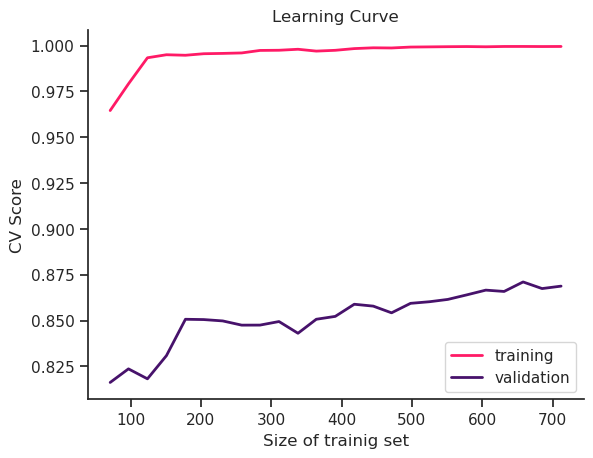

In [78]:
lgbm = LGBMClassifier(random_state=42)
cvs(lgbm); plot_learning_curve(lgbm)

max value is 0.01


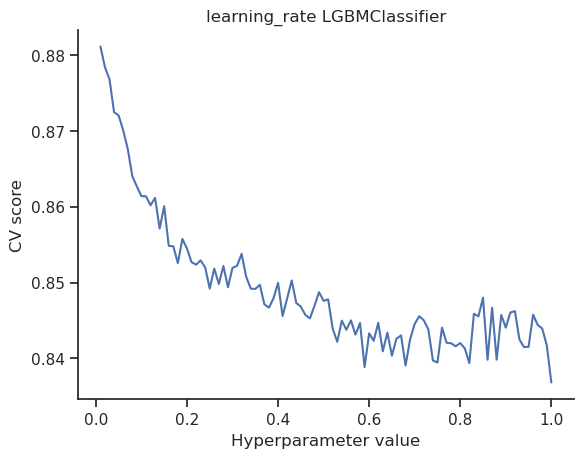

In [79]:
curve = []
hp_vals = np.linspace(0.01, 1, 100)
for val in hp_vals:
    model = LGBMClassifier(learning_rate=val,
                           n_estimators=200 ,
                           random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='roc_auc'))
    curve.append(mean_cvs)
    lgbm_learning_rate = hp_vals[curve.index(max(curve))]
    
print('max value is', lgbm_learning_rate)

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='learning_rate LGBMClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show()

max value is 6


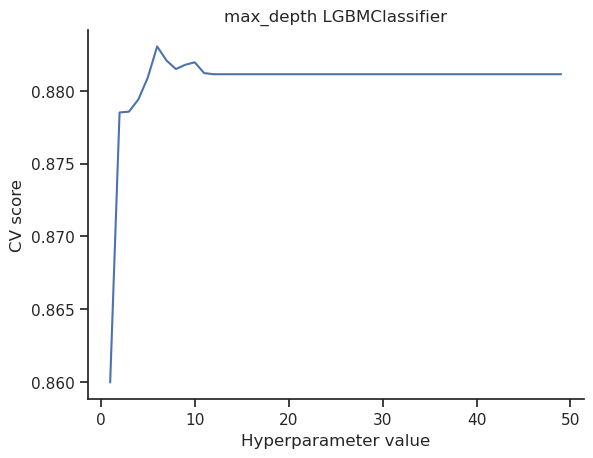

In [80]:
curve = []
hp_vals = range(1, 50)
for val in hp_vals:
    model = LGBMClassifier(max_depth=val,
                           learning_rate=lgbm_learning_rate,
                           n_estimators=200,
                           random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='roc_auc'))
    curve.append(mean_cvs)
    lgbm_max_depth = hp_vals[curve.index(max(curve))]
    
print('max value is', lgbm_max_depth)

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='max_depth LGBMClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show()

max value is 3


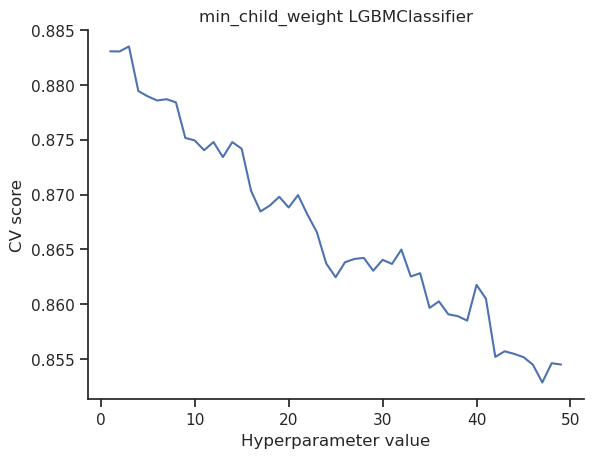

In [81]:
curve = []
hp_vals = range(1, 50)
for val in hp_vals:
    model = LGBMClassifier(min_child_weight=val,
                           max_depth=lgbm_max_depth,
                           learning_rate=lgbm_learning_rate,
                           n_estimators=200,
                           random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='roc_auc'))
    curve.append(mean_cvs)
    lgbm_min_child_weight = hp_vals[curve.index(max(curve))]
    
print('max value is', lgbm_min_child_weight)

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='min_child_weight LGBMClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show()

max value is 15


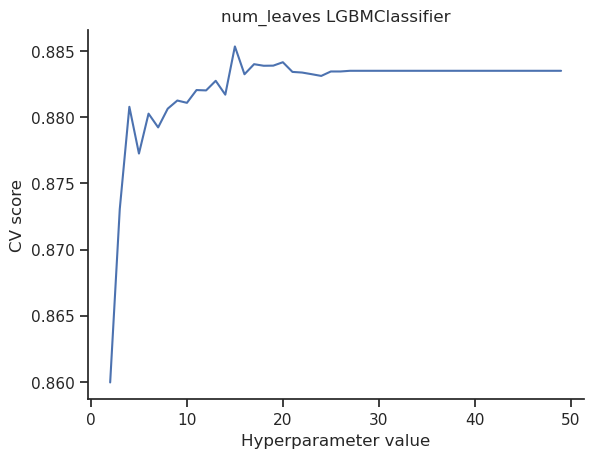

In [82]:
curve = []
hp_vals = range(2, 50)
for val in hp_vals:
    model = LGBMClassifier(num_leaves=val,
                           min_child_weight=lgbm_min_child_weight,
                           max_depth=lgbm_max_depth,
                           learning_rate=lgbm_learning_rate,
                           n_estimators=200,
                           random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='roc_auc'))
    curve.append(mean_cvs)
    lgbm_num_leaves = hp_vals[curve.index(max(curve))]
    
print('max value is', lgbm_num_leaves)

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='num_leaves LGBMClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show()

max value is 0


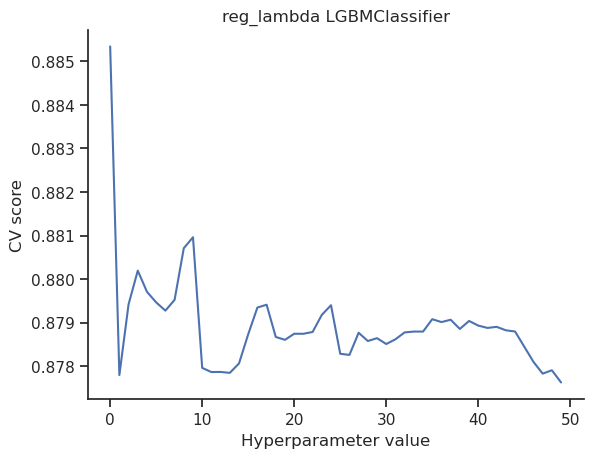

In [83]:
curve = []
hp_vals = range(0, 50)
for val in hp_vals:
    model = LGBMClassifier(reg_lambda=val,
                           num_leaves=lgbm_num_leaves,
                           min_child_weight=lgbm_min_child_weight,
                           max_depth=lgbm_max_depth,
                           learning_rate=lgbm_learning_rate,
                           n_estimators=200,
                           random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='roc_auc'))
    curve.append(mean_cvs)
    lgbm_reg_lambda = hp_vals[curve.index(max(curve))]
    
print('max value is', lgbm_reg_lambda)

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='reg_lambda LGBMClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show()

max value is 0


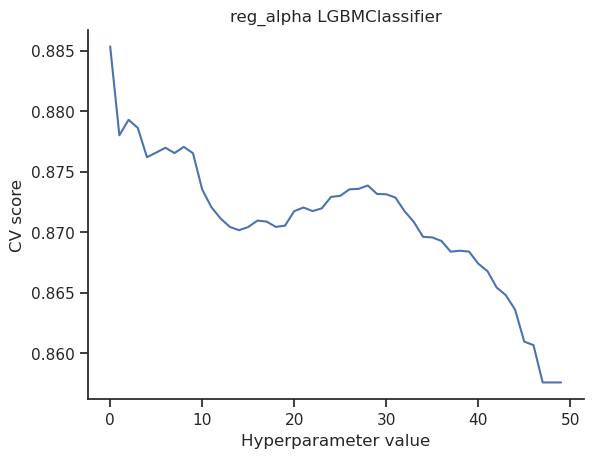

In [84]:
curve = []
hp_vals = range(0, 50)
for val in hp_vals:
    model = LGBMClassifier(reg_alpha=val,
                           reg_lambda=lgbm_reg_lambda,
                           num_leaves=lgbm_num_leaves,
                           min_child_weight=lgbm_min_child_weight,
                           max_depth=lgbm_max_depth,
                           learning_rate=lgbm_learning_rate,
                           n_estimators=200,
                           random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='roc_auc'))
    curve.append(mean_cvs)
    lgbm_reg_alpha = hp_vals[curve.index(max(curve))]
    
print('max value is', lgbm_reg_alpha)

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='reg_alpha LGBMClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show()

count    10.000000
mean      0.881688
std       0.043442
min       0.786797
25%       0.867851
50%       0.882163
75%       0.899291
max       0.948750
dtype: float64


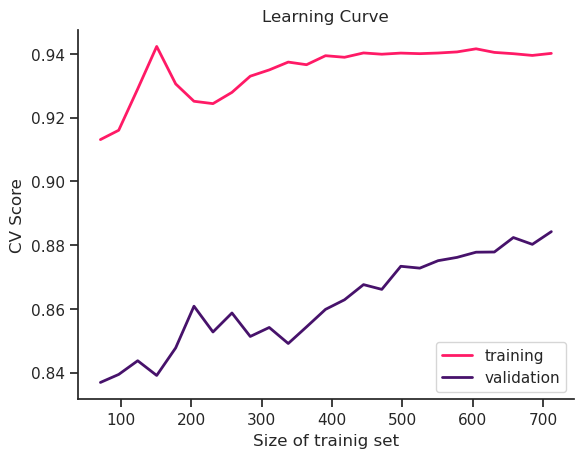

In [85]:
lgbm = LGBMClassifier(reg_alpha=lgbm_reg_alpha,
                      reg_lambda=lgbm_reg_lambda,
                      num_leaves=lgbm_num_leaves,
                      min_child_weight=lgbm_min_child_weight,
                      max_depth=lgbm_max_depth,
                      learning_rate=lgbm_learning_rate,
                      n_estimators=200,
                      random_state=42)

cvs(lgbm); plot_learning_curve(lgbm)

# 4.4 Fine Tuning of CatBoostClassifier
After attempting to optimize the CatBoostClassifier, I observed that its performance worsened and the optimization process took longer. Therefore, I have decided to use the default version, as it appears to be sufficient for my needs.

count    10.000000
mean      0.886479
std       0.039404
min       0.820887
25%       0.863929
50%       0.878192
75%       0.913659
max       0.951250
dtype: float64


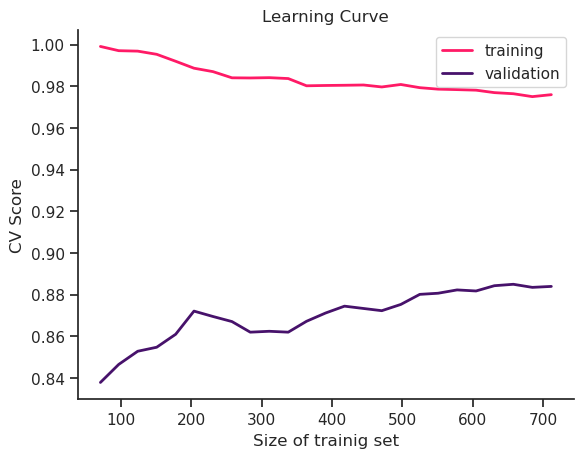

In [86]:
cb = CatBoostClassifier(random_state=42, verbose=0)

cvs(cb); plot_learning_curve(cb)

# 4.5 Fine Tuning of GradientBoostingClassifier

count    10.000000
mean      0.882265
std       0.046079
min       0.796807
25%       0.857251
50%       0.886529
75%       0.922294
max       0.938125
dtype: float64


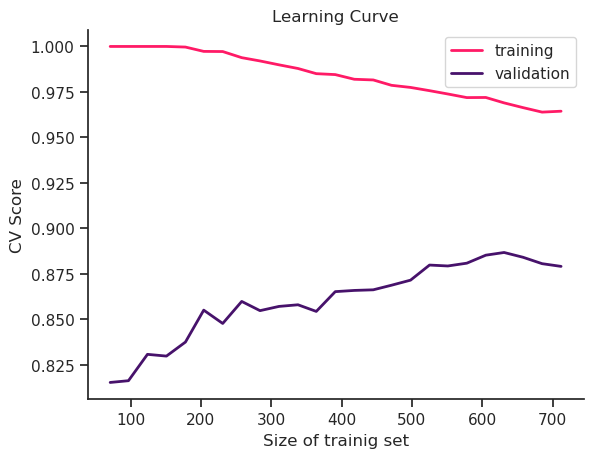

In [87]:
gbc = GradientBoostingClassifier(random_state=42)

cvs(gbc); plot_learning_curve(gbc)

max value is 100


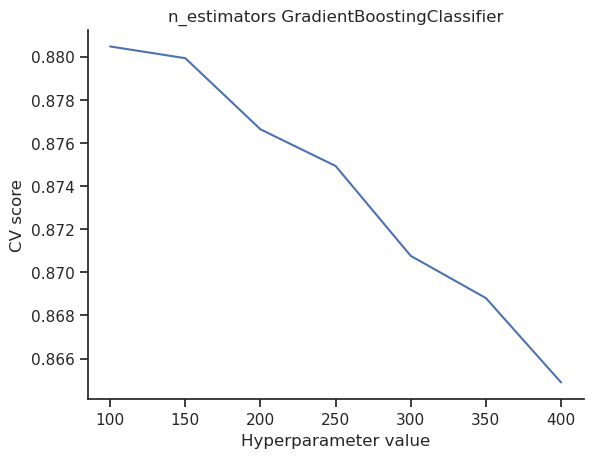

In [88]:
curve = []
hp_vals = [100, 150, 200, 250, 300, 350, 400]
for val in hp_vals:
    model = GradientBoostingClassifier(n_estimators=val,
                                       random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='roc_auc'))
    curve.append(mean_cvs)
    gbc_n_estimators = hp_vals[curve.index(max(curve))]
    
print('max value is', gbc_n_estimators)

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='n_estimators GradientBoostingClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show()

max value is 3


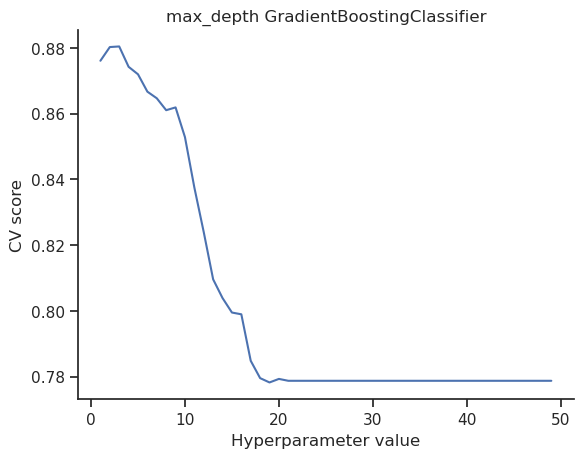

In [89]:
curve = []
hp_vals = range(1, 50)
for val in hp_vals:
    model = GradientBoostingClassifier(max_depth=val,
                                       n_estimators=gbc_n_estimators,
                                       random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='roc_auc'))
    curve.append(mean_cvs)
    gbc_max_depth = hp_vals[curve.index(max(curve))]
    
print('max value is', gbc_max_depth)

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='max_depth GradientBoostingClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show()

max value is 1


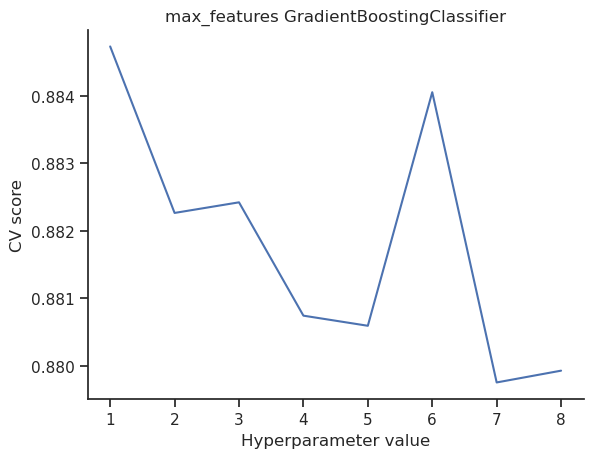

In [90]:
curve = []
hp_vals = range(1, 9)
for val in hp_vals:
    model = GradientBoostingClassifier(max_features=val,
                                       max_depth=gbc_max_depth,
                                       n_estimators=gbc_n_estimators,
                                       random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='roc_auc'))
    curve.append(mean_cvs)
    gbc_max_features = hp_vals[curve.index(max(curve))]
    
print('max value is', gbc_max_features)

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='max_features GradientBoostingClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show()

max value is 2


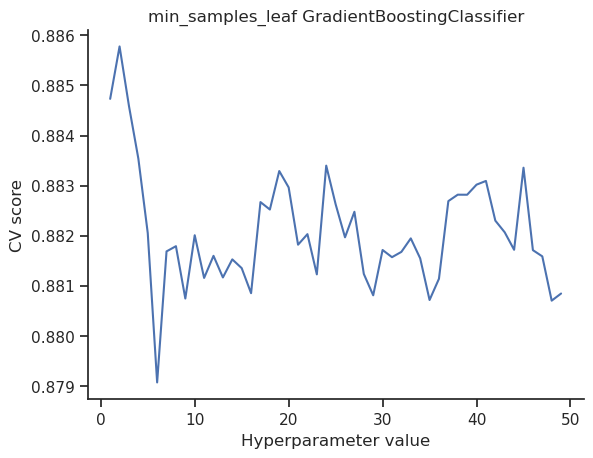

In [91]:
curve = []
hp_vals = range(1, 50)
for val in hp_vals:
    model = GradientBoostingClassifier(min_samples_leaf=val,
                                       max_features=gbc_max_features,
                                       max_depth=gbc_max_depth,
                                       n_estimators=gbc_n_estimators,
                                       random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='roc_auc'))
    curve.append(mean_cvs)
    gbc_min_samples_leaf = hp_vals[curve.index(max(curve))]
    
print('max value is', gbc_min_samples_leaf)

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='min_samples_leaf GradientBoostingClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show()

max value is 5


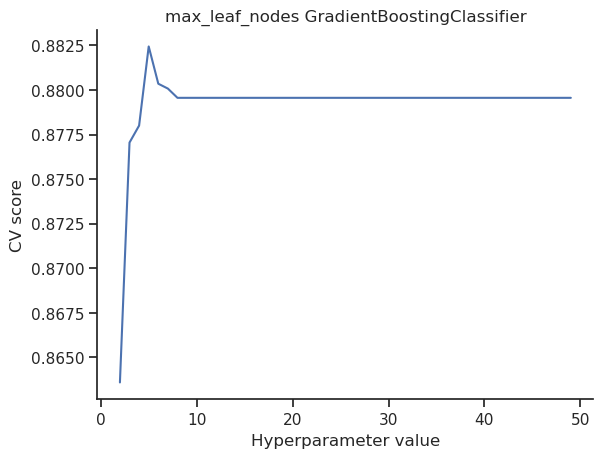

In [92]:
curve = []
hp_vals = range(2, 50)
for val in hp_vals:
    model = GradientBoostingClassifier(max_leaf_nodes=val,
                                       min_samples_leaf=gbc_min_samples_leaf,
                                       max_features=gbc_max_features,
                                       max_depth=gbc_max_depth,
                                       n_estimators=gbc_n_estimators,
                                       random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=kfold5, scoring='roc_auc'))
    curve.append(mean_cvs)
    gbc_max_leaf_nodes = hp_vals[curve.index(max(curve))]
    
print('max value is', gbc_max_leaf_nodes)

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='max_leaf_nodes GradientBoostingClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show()

count    10.000000
mean      0.883210
std       0.039239
min       0.820887
25%       0.863978
50%       0.879435
75%       0.903598
max       0.954063
dtype: float64


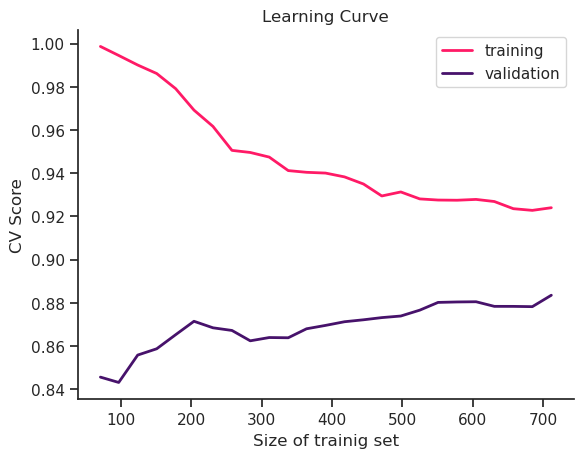

In [93]:
gbc = GradientBoostingClassifier(max_leaf_nodes=gbc_max_leaf_nodes,
                                 min_samples_leaf=gbc_min_samples_leaf,
                                 max_features=gbc_max_features,
                                 max_depth=gbc_max_depth,
                                 n_estimators=gbc_n_estimators,
                                 random_state=42)

cvs(gbc); plot_learning_curve(gbc)

# 4.6 Fine Tuning of LogisticRegression

count    10.000000
mean      0.871216
std       0.047651
min       0.794915
25%       0.837778
50%       0.876253
75%       0.898687
max       0.945625
dtype: float64


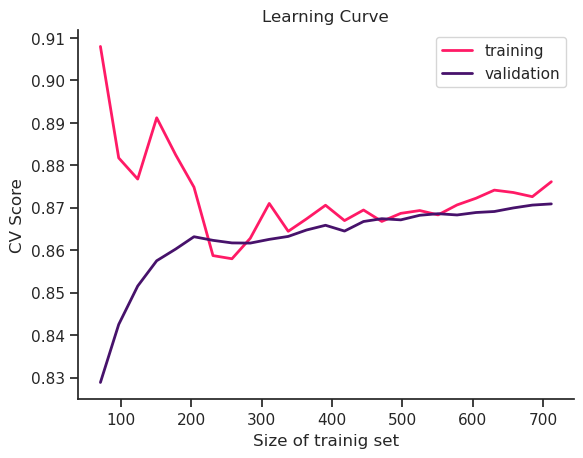

In [94]:
log_reg = LogisticRegression(random_state=42)

cvs(log_reg); plot_learning_curve(log_reg)

max value is 1.0


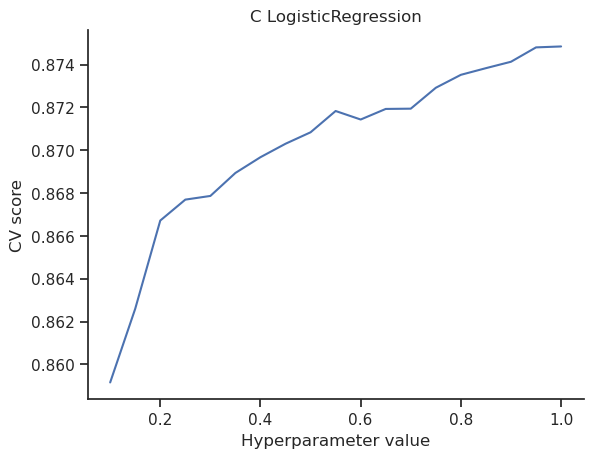

In [95]:
curve = []
hp_vals = np.linspace(0.1, 1.0, 19)
for val in hp_vals:
    model = LogisticRegression(C=val, random_state=42)
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train,
                                       cv=KFold(n_splits=20, shuffle=True, random_state=42), scoring='roc_auc'))
    curve.append(mean_cvs)
    lr_C = hp_vals[curve.index(max(curve))]
    
print('max value is', lr_C)

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='C LogisticRegression', xlabel='Hyperparameter value', ylabel='CV score')
plt.show()

count    10.000000
mean      0.871216
std       0.047651
min       0.794915
25%       0.837778
50%       0.876253
75%       0.898687
max       0.945625
dtype: float64


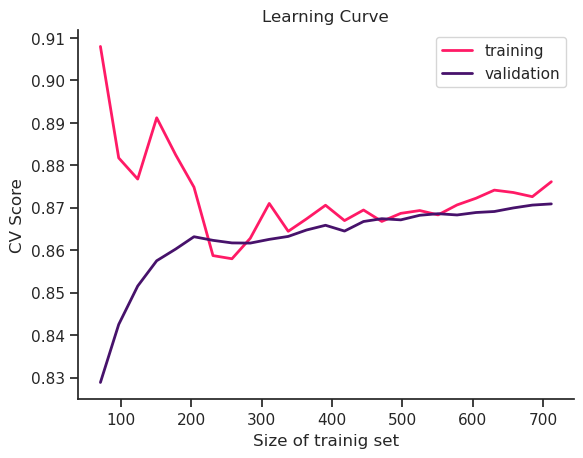

In [96]:
log_reg = LogisticRegression(C=lr_C, random_state=42)

cvs(log_reg); plot_learning_curve(log_reg)

# 4.7 Fine Tuning of SGDClassifier

count    10.000000
mean      0.864883
std       0.047346
min       0.786441
25%       0.838478
50%       0.860479
75%       0.891359
max       0.939375
dtype: float64


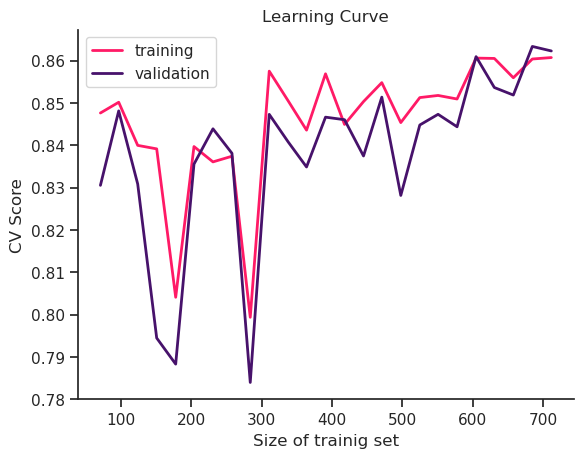

In [97]:
sgdc = SGDClassifier(random_state=42)

cvs(sgdc); plot_learning_curve(sgdc)

max value is l1


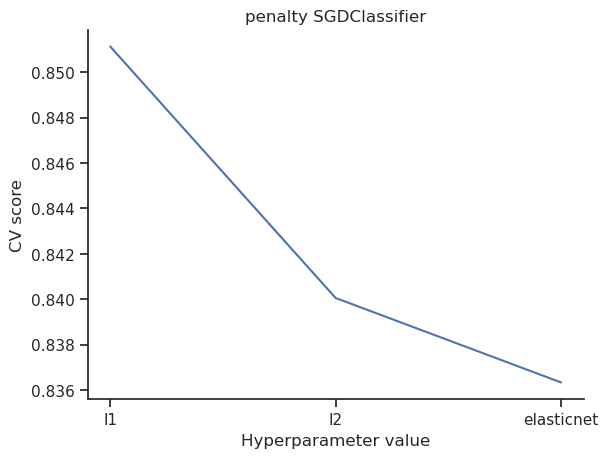

In [98]:
curve = []
hp_vals = ['l1', 'l2', 'elasticnet']
for val in hp_vals:
    model = make_pipeline(StandardScaler(), SGDClassifier(penalty=val, random_state=42))
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train,
                                       cv=KFold(n_splits=20, shuffle=True, random_state=42), scoring='roc_auc'))
    curve.append(mean_cvs)
    sgdc_penalty = hp_vals[curve.index(max(curve))]
    
print('max value is', sgdc_penalty)

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='penalty SGDClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show()

max value is 0.001


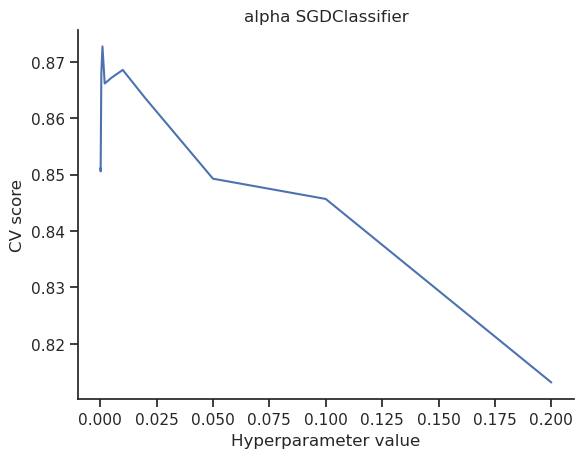

In [99]:
curve = []
hp_vals = [0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2]
for val in hp_vals:
    model = make_pipeline(StandardScaler(), SGDClassifier(alpha=val,
                                                          penalty=sgdc_penalty,
                                                          random_state=42))
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train,
                                       cv=KFold(n_splits=20, shuffle=True, random_state=42), scoring='roc_auc'))
    curve.append(mean_cvs)
    sgdc_alpha = hp_vals[curve.index(max(curve))]
    
print('max value is', sgdc_alpha)

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='alpha SGDClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show()

count    10.000000
mean      0.863665
std       0.045341
min       0.798305
25%       0.829545
50%       0.860683
75%       0.884570
max       0.940625
dtype: float64


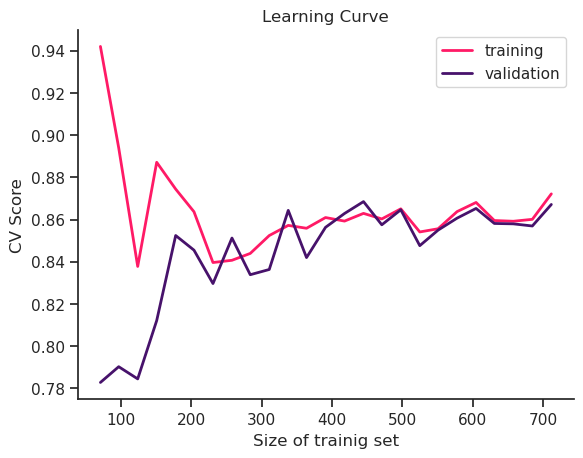

In [100]:
sgdc = make_pipeline(StandardScaler(), SGDClassifier(alpha=sgdc_alpha,
                                                     penalty=sgdc_penalty,
                                                     random_state=42))

cvs(sgdc); plot_learning_curve(sgdc)

# 4.8 Fine Tuning of SVC

count    10.000000
mean      0.832274
std       0.044720
min       0.779762
25%       0.790678
50%       0.834823
75%       0.871875
max       0.898349
dtype: float64


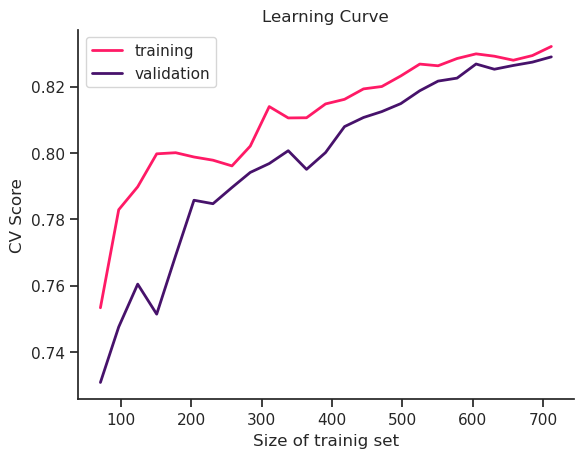

In [101]:
svc_clf = SVC(random_state=42)

cvs(svc_clf); plot_learning_curve(svc_clf)

max value is 0.8500000000000002


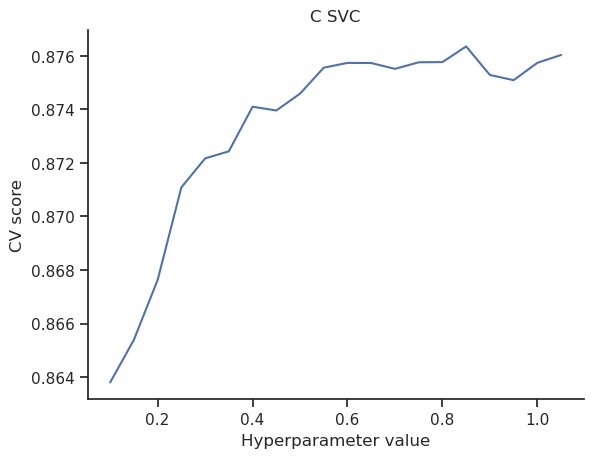

In [102]:
curve = []
hp_vals = np.arange(0.1, 1.1, 0.05)
for val in hp_vals:
    model = make_pipeline(StandardScaler(), SVC(C=val, random_state=42))
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train, cv=KFold(n_splits=20, shuffle=True, random_state=42), scoring='roc_auc'))
    curve.append(mean_cvs)
    svc_C = hp_vals[curve.index(max(curve))]
    
print('max value is', svc_C)

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='C SVC', xlabel='Hyperparameter value', ylabel='CV score')
plt.show()

max value is poly


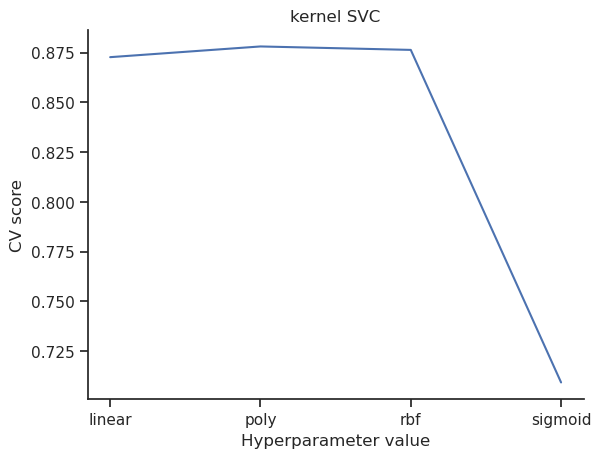

In [103]:
curve = []
hp_vals = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
for val in hp_vals:
    model = make_pipeline(StandardScaler(), SVC(kernel=val,
                                                C=svc_C,
                                                random_state=42))
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train,
                                       cv=KFold(n_splits=20, shuffle=True, random_state=42), scoring='roc_auc'))
    curve.append(mean_cvs)
    
print('max value is', hp_vals[curve.index(max(curve))])

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='kernel SVC', xlabel='Hyperparameter value', ylabel='CV score')
plt.show()

count    10.000000
mean      0.874655
std       0.035066
min       0.808983
25%       0.854412
50%       0.878021
75%       0.895108
max       0.933750
dtype: float64


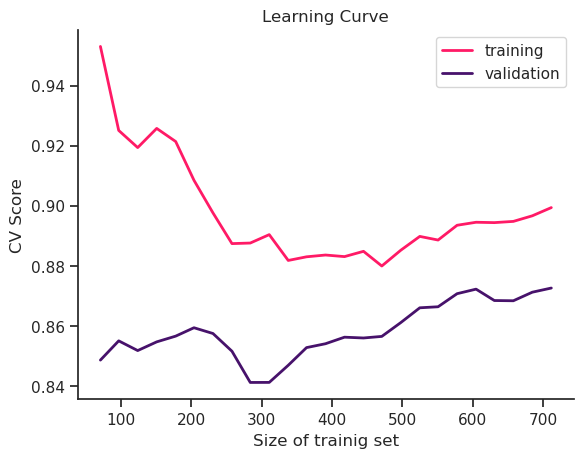

In [104]:
svc_clf = make_pipeline(StandardScaler(), SVC(C=svc_C, random_state=42))
                      
cvs(svc_clf); plot_learning_curve(svc_clf)

# 4.9 Fine Tuning of KNeighborsClassifier

count    10.000000
mean      0.815187
std       0.050724
min       0.736472
25%       0.777224
50%       0.815701
75%       0.852059
max       0.901250
dtype: float64


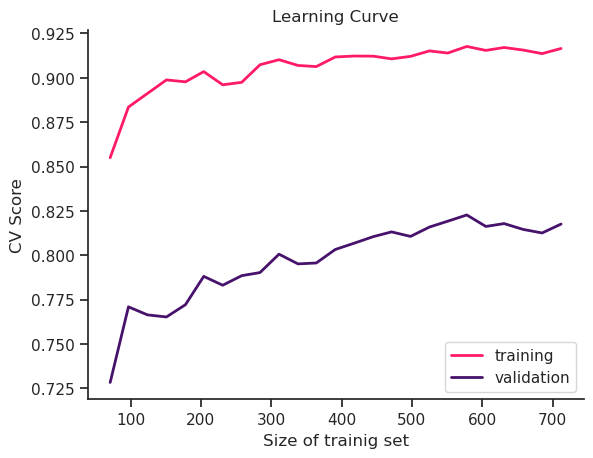

In [105]:
knnc = KNeighborsClassifier()

cvs(knnc); plot_learning_curve(knnc)

max value is 10


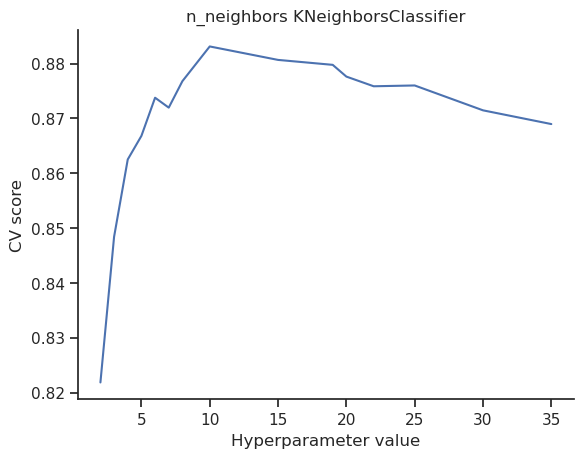

In [106]:
curve = []
hp_vals = [2, 3, 4, 5, 6, 7, 8, 10, 15, 19, 20, 22, 25, 30, 35]
for val in hp_vals:
    model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=val))
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train,
                                       cv=KFold(n_splits=20, shuffle=True, random_state=42), scoring='roc_auc'))
    curve.append(mean_cvs)
    knnc_n_neighbors = hp_vals[curve.index(max(curve))]
    
print('max value is', knnc_n_neighbors)

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='n_neighbors KNeighborsClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show()

max value is uniform


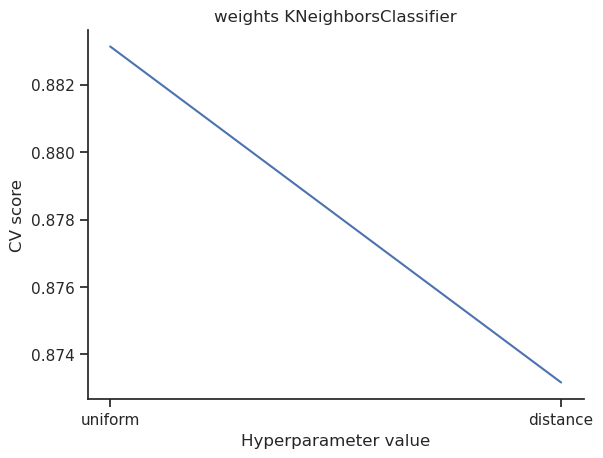

In [107]:
curve = []
hp_vals = ['uniform', 'distance']
for val in hp_vals:
    model = make_pipeline(StandardScaler(), KNeighborsClassifier(weights=val,
                                                                 n_neighbors=knnc_n_neighbors))
    mean_cvs = np.mean(cross_val_score(model, X_train, y_train,
                                       cv=KFold(n_splits=20, shuffle=True, random_state=42), scoring='roc_auc'))
    curve.append(mean_cvs)
    knnc_weights = hp_vals[curve.index(max(curve))]
    
print('max value is', knnc_weights)

hp_curve = sns.lineplot(x=hp_vals, y=curve)
hp_curve.set(title='weights KNeighborsClassifier', xlabel='Hyperparameter value', ylabel='CV score')
plt.show()

count    10.000000
mean      0.878951
std       0.048345
min       0.807900
25%       0.840192
50%       0.880105
75%       0.905010
max       0.966875
dtype: float64


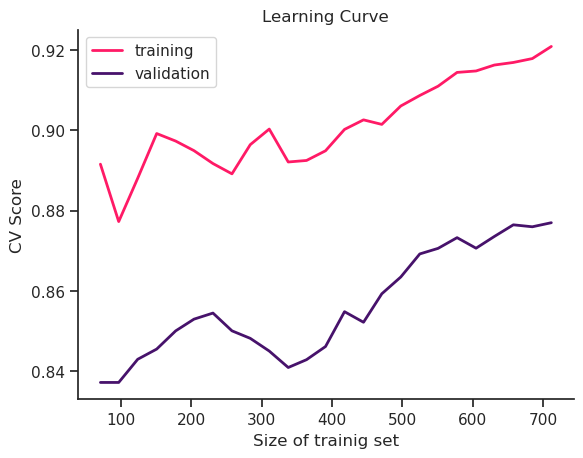

In [108]:
knnc = make_pipeline(StandardScaler(), KNeighborsClassifier(weights=knnc_weights, n_neighbors=knnc_n_neighbors))

cvs(knnc); plot_learning_curve(knnc)

# 5. Final Model and Prediction

| Model                       | **Mean Accuracy** | Standard Deviation | Min Accuracy | 25th Percentile | 50th Percentile | 75th Percentile | Max Accuracy |
|-----------------------------|--------------|--------------------|--------------|-----------------|-----------------|-----------------|--------------|
| CatBoostClassifier        | **0.841394** | 0.027238 | 0.797753 | 0.823034 | 0.841803 | 0.862360 | 0.876404 |
| XGBClassifier             | **0.835751** | 0.031987 | 0.797753 | 0.811287 | 0.831461 | 0.867978 | 0.876404 |
| RandomForestClassifier    | **0.834678** | 0.022278 | 0.797753 | 0.825843 | 0.842697 | 0.842697 | 0.863636 |
| LGBMClassifier            | **0.834665** | 0.027931 | 0.775281 | 0.831461 | 0.842697 | 0.853518 | 0.865169 |
| GradientBoostingClassifier| **0.839160** | 0.022389 | 0.808989 | 0.823034 | 0.842697 | 0.849879 | 0.876404 |
| SVC                       | **0.834614** | 0.030662 | 0.786517 | 0.808989 | 0.837079 | 0.862360 | 0.876404 |
| KNeighborsClassifier      | **0.822255** | 0.037095 | 0.752809 | 0.807361 | 0.814607 | 0.848315 | 0.887640 |
| SGDClassifier             | **0.807623** | 0.028954 | 0.775281 | 0.787506 | 0.797753 | 0.828652 | 0.865169 |
| LogisticRegression        | **0.812142** | 0.035184 | 0.752809 | 0.789326 | 0.813521 | 0.831461 | 0.865169 |


In [109]:
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score

In [110]:
stacking_classifier = StackingClassifier(estimators=[('CatBoostClassifier', cb),
                                                     ('XGBClassifier', xgbc),
                                                     ('RandomForestClassifier', random_forest),
                                                     ('LGBMClassifier', lgbm),
                                                     ('GradientBoostingClassifier', gbc)])

stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('CatBoostClassifier',
                                <catboost.core.CatBoostClassifier object at 0x7f23b431ee10>),
                               ('XGBClassifier',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None, gamma=0,
                                              gpu_id=None, grow_pol...
                                                       max_leaf_nodes=55,
                                                       min_samples_split=14,
               

In [111]:
scoring = {'precision': make_scorer(precision_score), 
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score),
           'roc_auc': make_scorer(roc_auc_score)}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

precision_scores = cross_val_score(stacking_classifier, X_train, y_train, scoring=scoring['precision'], cv=cv)
recall_scores = cross_val_score(stacking_classifier, X_train, y_train, scoring=scoring['recall'], cv=cv)
f1_scores = cross_val_score(stacking_classifier, X_train, y_train, scoring=scoring['f1'], cv=cv)
roc_scores = cross_val_score(stacking_classifier, X_train, y_train, scoring=scoring['roc_auc'], cv=cv)

print('Precision:', np.mean(precision_scores))
print('Recall:', np.mean(recall_scores))
print('F1 score:', np.mean(f1_scores))
print('ROC AUC:', np.mean(roc_scores))

Precision: 0.81972620049687
Recall: 0.7601449275362319
F1 score: 0.7883647214320431
ROC AUC: 0.8281458582635288


In [112]:
# Make predictions on the test set
predictions = stacking_classifier.predict(X_test)

# Create a dictionary to hold the PassengerId and predicted survival status
sm_dict = {'PassengerId': p_id, 'Survived': predictions}

# Convert the dictionary to a pandas DataFrame
submission = pd.DataFrame(sm_dict)

# Save the DataFrame to a CSV file without including the index
submission.to_csv('submission.csv', index=False)